<a href="https://colab.research.google.com/github/maimonahST/GP/blob/main/Final%20Version/PCA16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Pip

In [1]:
! pip install mne
import mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Sample

This section displays the changes in the data that occur throughout the process.


Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Using matplotlib as 2D backend.


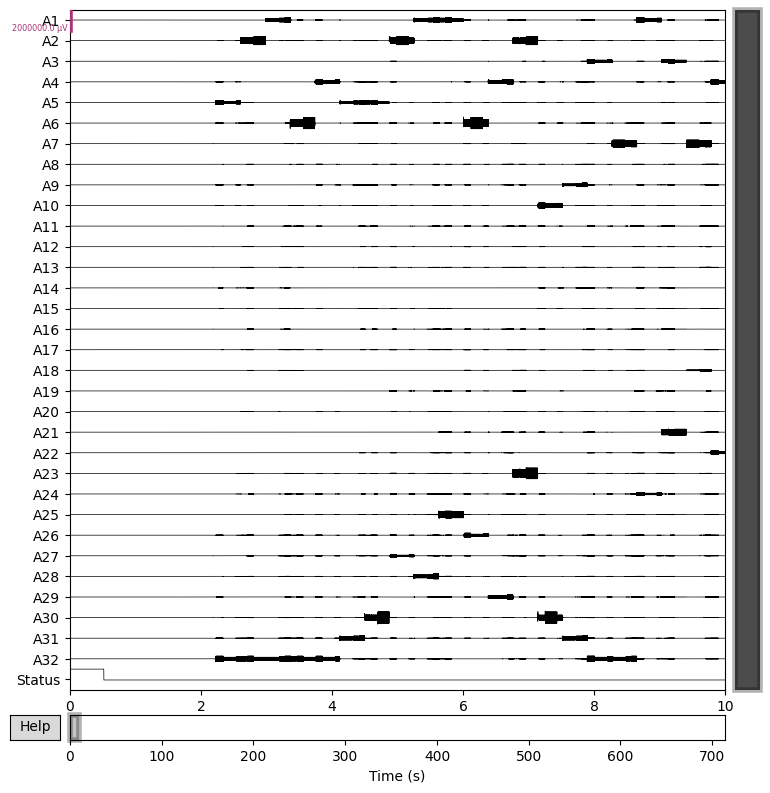

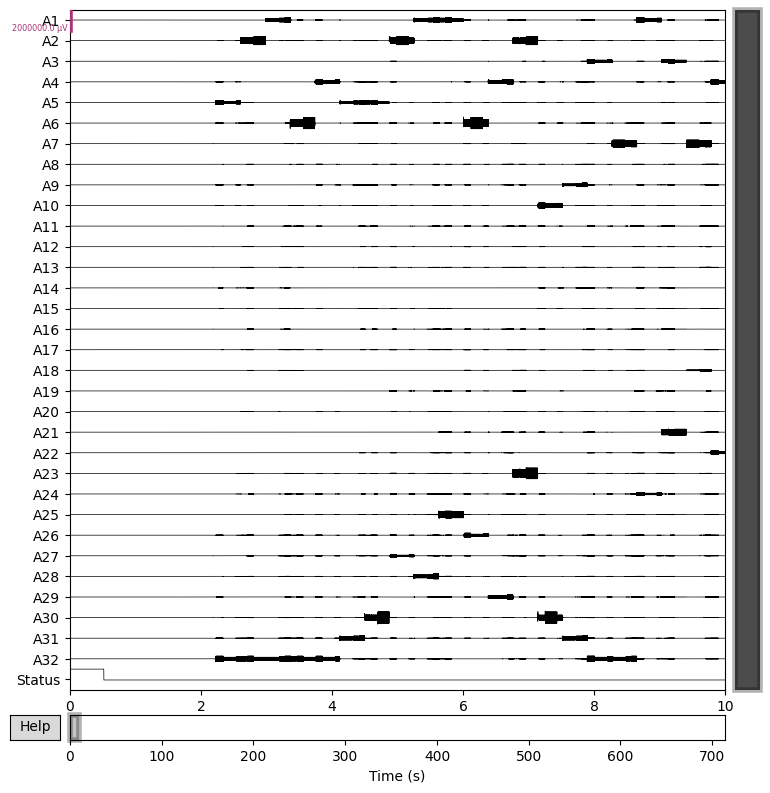

In [ ]:
import mne

# Step 1: load sample
file_path = '/content/drive/MyDrive/GP/GP-Data/Ischaemia/P16_TD1.bdf'
raw = mne.io.read_raw_bdf(file_path, preload=True)


# show the original sample
raw.plot(n_channels=len(raw.ch_names), scalings={'eeg': 1})

Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]


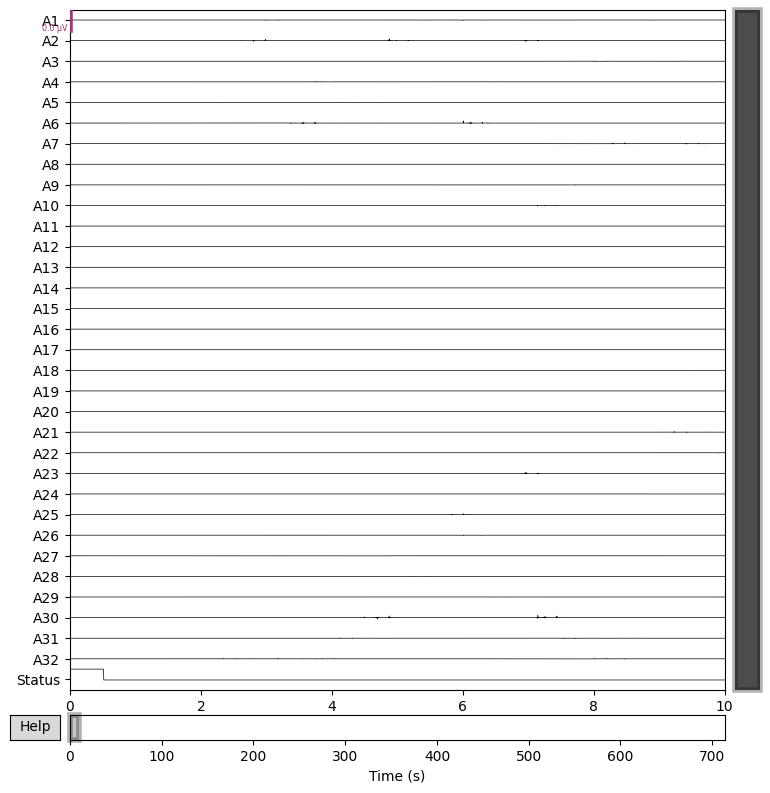

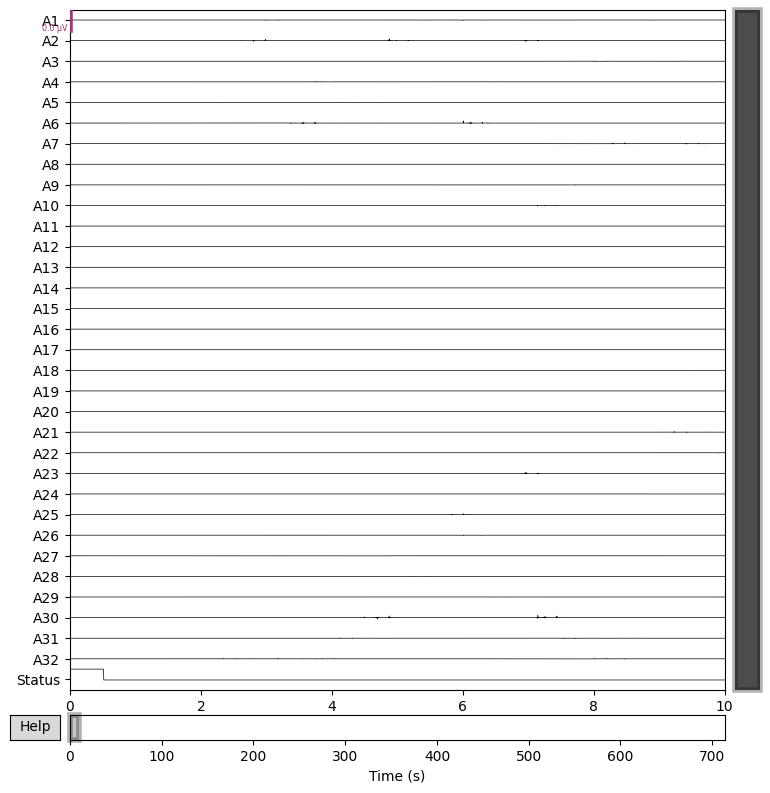

In [ ]:
# Step 2: Resample the sample

resampled = raw.copy().resample(250)
resampled.plot(n_channels=len(raw.ch_names), scalings={'eeg': 0})

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


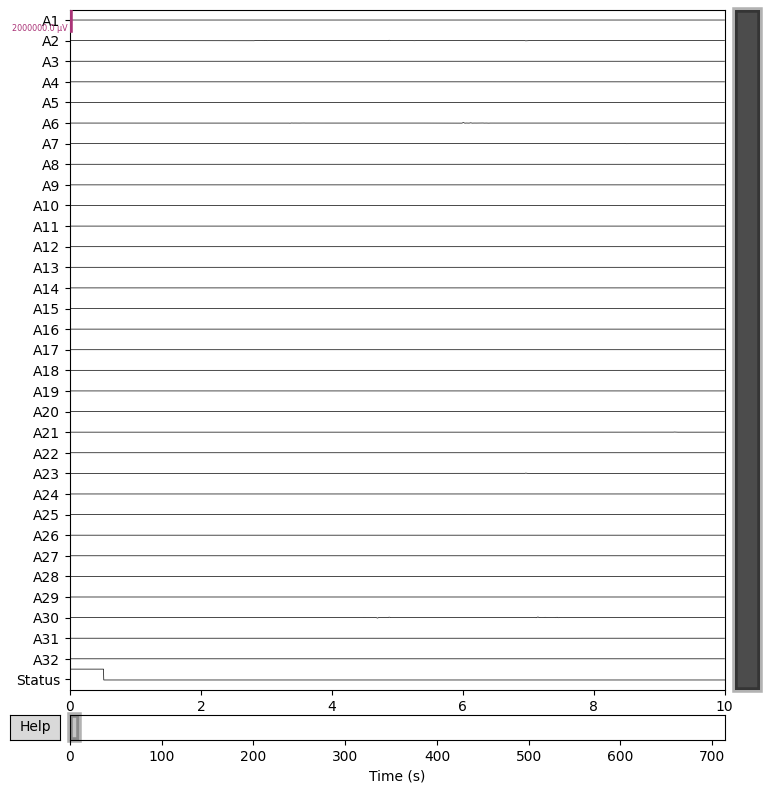

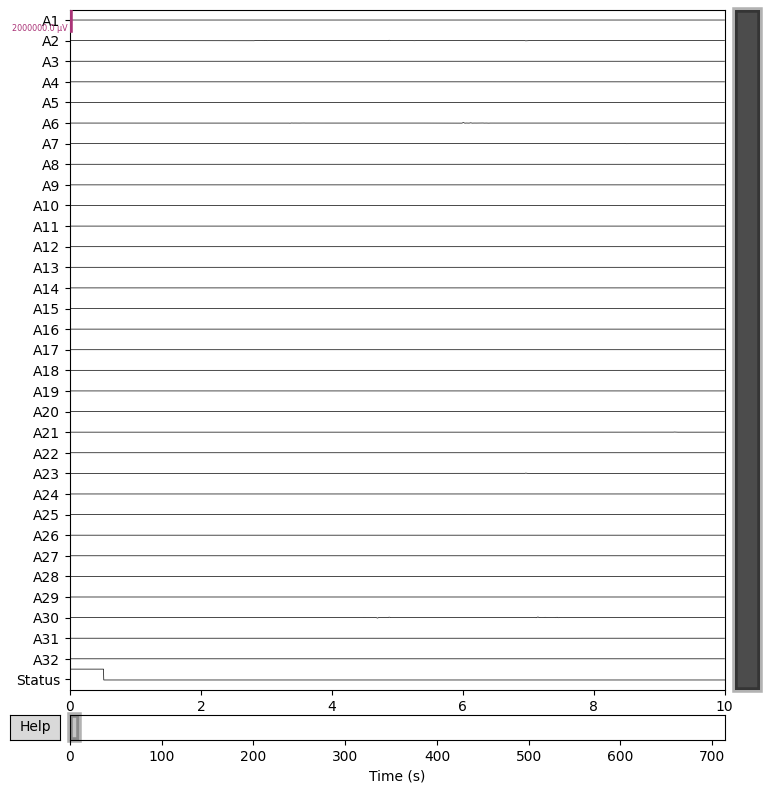

In [ ]:
# Step 3: Filter the resampled data

filterd = resampled.copy().filter(0.5, 25, fir_design='firwin')
filterd.plot(n_channels=len(raw.ch_names), scalings={'eeg': 1})

Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1250 original time points ...
0 bad epochs dropped


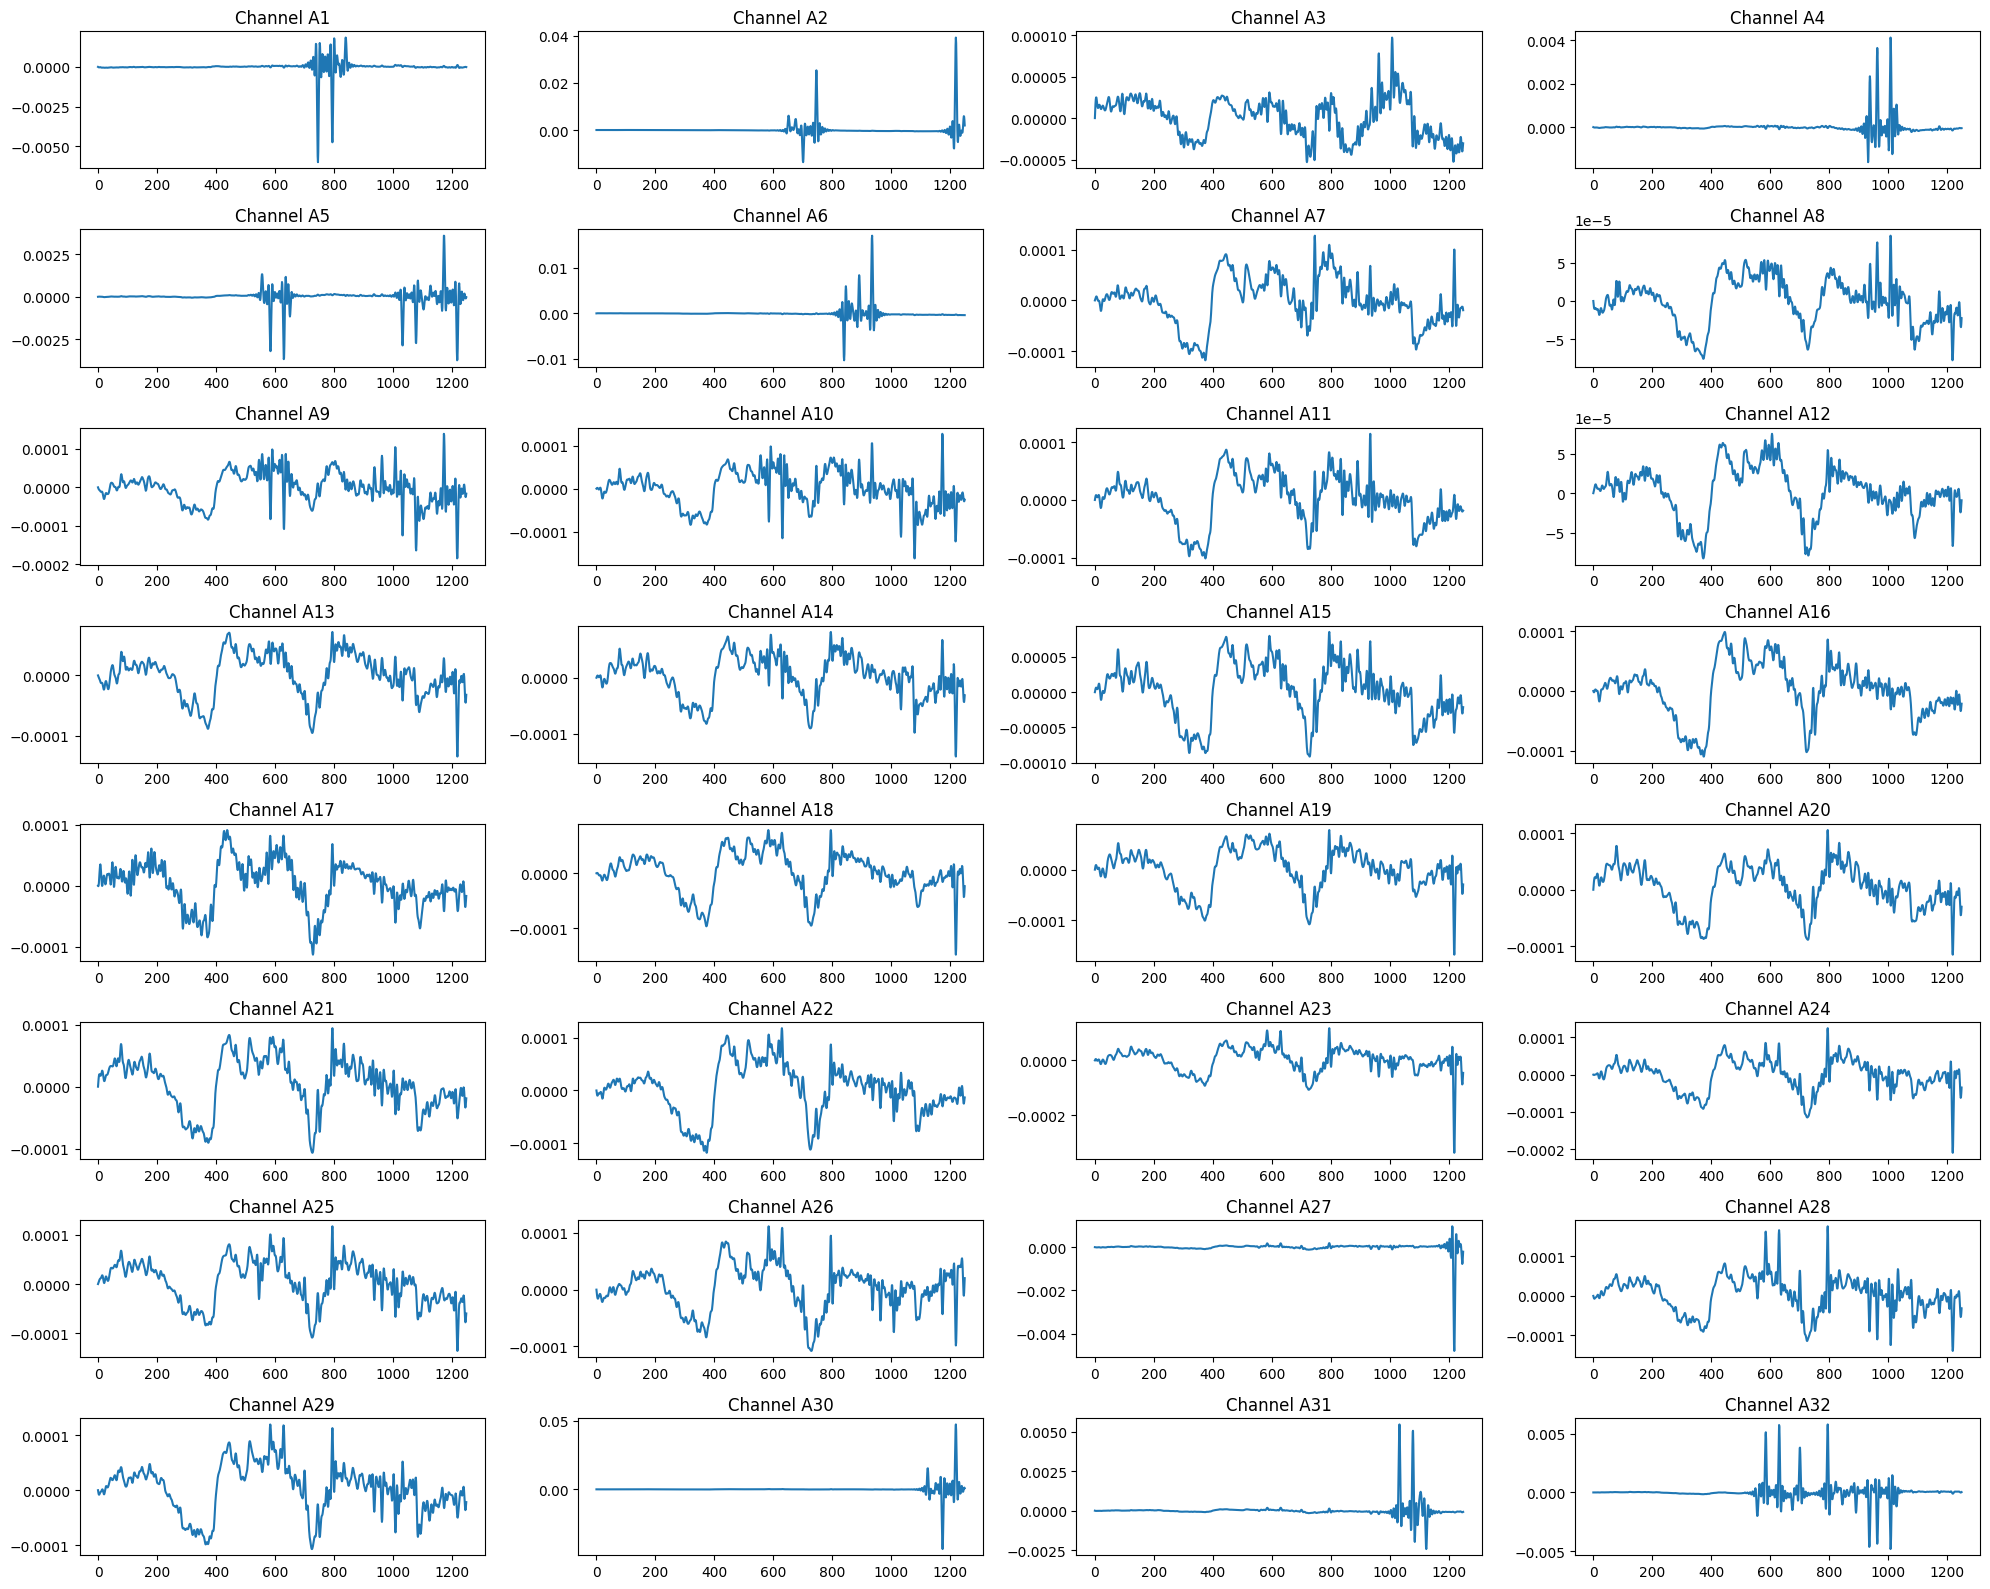

In [ ]:
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Step 4: Segment the filterd data
epochs = mne.make_fixed_length_epochs(filterd, duration=5, overlap=0.1)

# Step 5: Apply PCA
pca = UnsupervisedSpatialFilter(PCA(16), average=False)
X = epochs.get_data(copy=False)

# Get channel names
channel_names = epochs.ch_names

# Calculate the number of rows needed based on the number of channels (n)
num_rows = (X.shape[1] + 1) // 4

# Create a figure to contain all subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 2*num_rows))  # Adjust figsize as needed

# Plot filterd data for each channel
for i, ax in enumerate(axes.flat):
    if i < X.shape[1]:
        ax.plot(X[0, i, :])
        ax.set_title(f'Channel {channel_names[i]}')  # Set title as channel name
    else:
        ax.axis('off')  # Turn off any extra subplot if there are more than required

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure as one image
plt.savefig('all_subplots.png')

# Show the figure
plt.show()


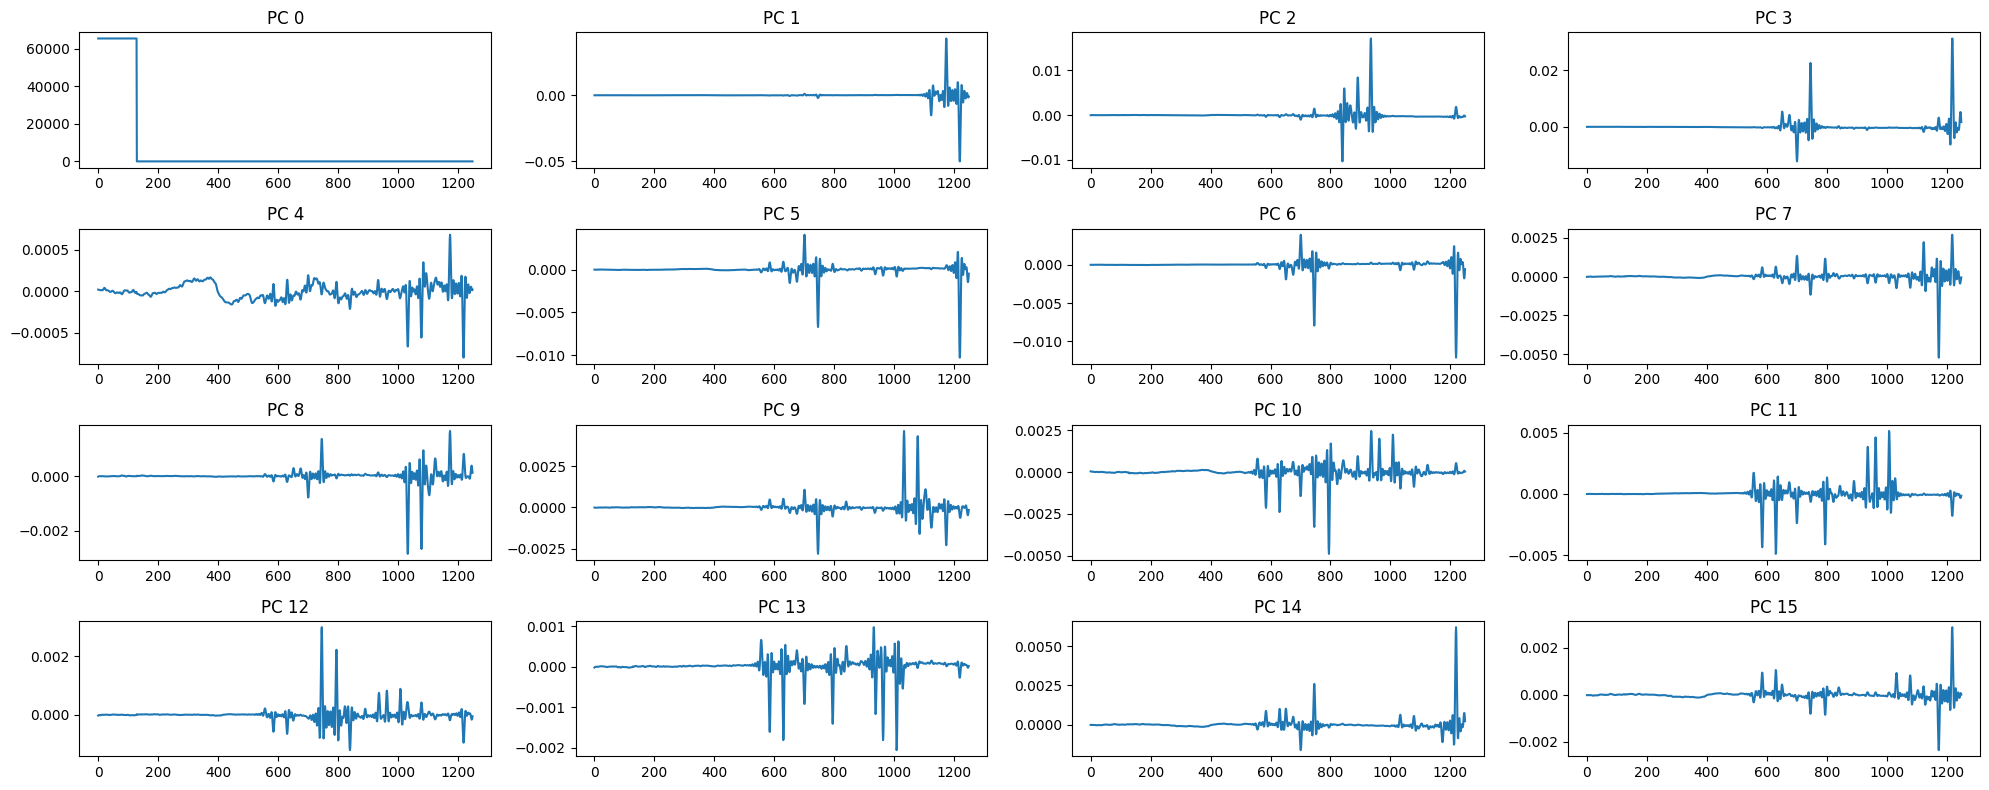

Removed channels: {'Status', 'A18', 'A29', 'A2', 'A9', 'A27', 'A26', 'A4', 'A15', 'A1', 'A22', 'A21', 'A6', 'A14', 'A32', 'A8', 'A23', 'A25', 'A12', 'A20', 'A31', 'A28', 'A30', 'A17', 'A3', 'A11', 'A7', 'A13', 'A16', 'A24', 'A5', 'A19', 'A10'}


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already computed 'pca_data' and 'ev'
pca_data = pca.fit_transform(X)
ev = mne.EvokedArray(
    np.mean(pca_data, axis=0),
    mne.create_info(16, epochs.info["sfreq"], ch_types="eeg")
)

# Get original channel names
original_channel_names = epochs.ch_names

# Get channel names after PCA
channel_names = ev.info['ch_names']

# Calculate the number of rows needed based on the number of channels (n)
num_rows = (pca_data.shape[1] + 1) // 4  # Ensure we have enough rows to accommodate all channels

# Create a figure to contain all subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 2*num_rows))  # Adjust figsize as needed

# Plot PCA data for each channel
for i, ax in enumerate(axes.flat):
    if i < pca_data.shape[1]:
        ax.plot(pca_data[0,i, :])
        ax.set_title(f'PC {channel_names[i]}')
    else:
        ax.axis('off')  # Turn off any extra subplot if there are more than required

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure as one image
plt.savefig('all_subplots.png')

# Show the figure
plt.show()



# Preprocessing

Processing 0 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P2_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12238847  =      0.000 ...   747.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22491 events found on stim channel Status
Event IDs: [65284 65288 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329 65336]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2889 events found on stim channel Status
Event IDs: [65296 65297 65305 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phas

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 0 data:  10%|█         | 1/10 [00:52<07:50, 52.30s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  20%|██        | 2/10 [01:44<06:56, 52.01s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed t

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  30%|███       | 3/10 [02:57<07:11, 61.62s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P10_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2752 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  40%|████      | 4/10 [03:53<05:57, 59.51s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  50%|█████     | 5/10 [04:45<04:45, 57.00s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P14_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2787 events found on stim channel Status
Event IDs: [65281 65296 65297 65312 65313 65328 65329]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, no

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  60%|██████    | 6/10 [05:38<03:41, 55.32s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  70%|███████   | 7/10 [06:29<02:42, 54.19s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  80%|████████  | 8/10 [07:23<01:47, 53.87s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  90%|█████████ | 9/10 [08:13<00:52, 52.86s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data: 100%|██████████| 10/10 [09:05<00:00, 54.50s/it]


Processed 10 samples for label 0


Processing 0 data:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  50%|█████     | 1/2 [00:51<00:51, 51.44s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


0 bad epochs dropped


Processing 0 data: 100%|██████████| 2/2 [02:30<00:00, 75.40s/it]


Processed 2 samples for label 0


Processing 1 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  10%|█         | 1/10 [00:53<08:00, 53.39s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain de

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  20%|██        | 2/10 [02:03<08:25, 63.14s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain de

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  30%|███       | 3/10 [02:59<06:58, 59.76s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass f

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  40%|████      | 4/10 [03:53<05:46, 57.70s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-do

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 5/10 [04:44<04:36, 55.39s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-do

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  60%|██████    | 6/10 [05:33<03:31, 52.91s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  70%|███████   | 7/10 [06:22<02:35, 51.91s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed ti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  80%|████████  | 8/10 [07:13<01:42, 51.44s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
/usr/local/lib/python3.10/dist-packages/mne/viz/evoked.py:463: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(len(ch_types_used), 1, layout="constrained")
Processing 1 data:  90%|█████████ | 9/10 [08:02<00:50, 50.72s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data: 100%|██████████| 10/10 [08:53<00:00, 53.34s/it]


Processed 10 samples for label 1


Processing 1 data:   0%|          | 0/4 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed t

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  25%|██▌       | 1/4 [00:48<02:25, 48.65s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-do

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 2/4 [01:37<01:37, 48.97s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  75%|███████▌  | 3/4 [02:28<00:49, 49.61s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed ti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 1 data: 100%|██████████| 4/4 [03:38<00:00, 54.74s/it]


Processed 4 samples for label 1


Processing 2 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  10%|█         | 1/10 [00:59<08:56, 59.58s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Window

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  20%|██        | 2/10 [01:51<07:20, 55.11s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  30%|███       | 3/10 [02:47<06:27, 55.35s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  40%|████      | 4/10 [03:37<05:20, 53.48s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  50%|█████     | 5/10 [04:30<04:26, 53.30s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  60%|██████    | 6/10 [05:19<03:27, 51.83s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  70%|███████   | 7/10 [06:11<02:35, 51.67s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  80%|████████  | 8/10 [07:02<01:42, 51.45s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Window

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  90%|█████████ | 9/10 [07:51<00:50, 50.74s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data: 100%|██████████| 10/10 [08:43<00:00, 52.35s/it]


Processed 10 samples for label 2


Processing 2 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  11%|█         | 1/9 [00:51<06:53, 51.73s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  22%|██▏       | 2/9 [02:01<07:17, 62.53s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  33%|███▎      | 3/9 [02:59<06:01, 60.28s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  44%|████▍     | 4/9 [03:52<04:46, 57.26s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Window

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  56%|█████▌    | 5/9 [04:42<03:38, 54.64s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  67%|██████▋   | 6/9 [05:34<02:41, 53.82s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  78%|███████▊  | 7/9 [06:24<01:45, 52.74s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Window

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  89%|████████▉ | 8/9 [07:17<00:52, 52.79s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data: 100%|██████████| 9/9 [08:09<00:00, 54.43s/it]


Processed 9 samples for label 2


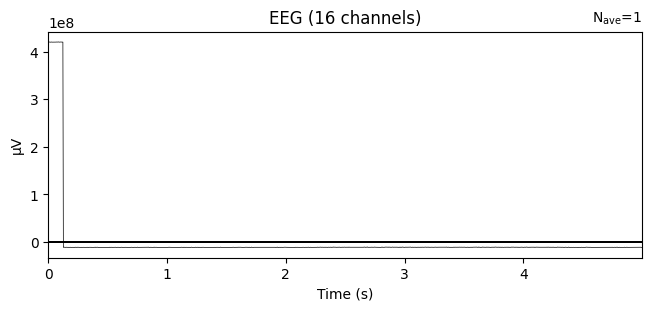

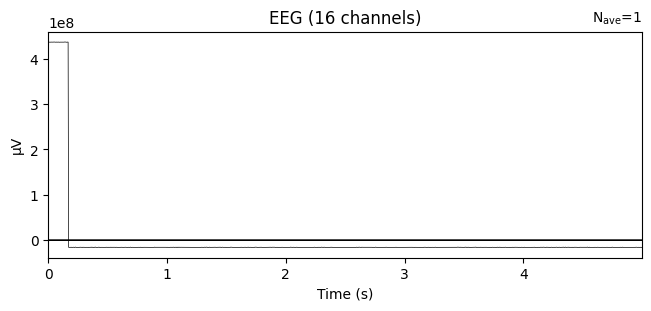

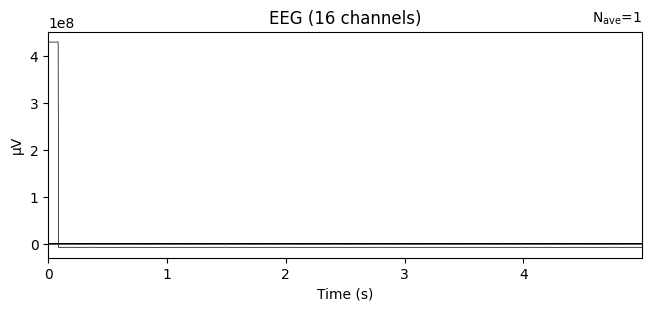

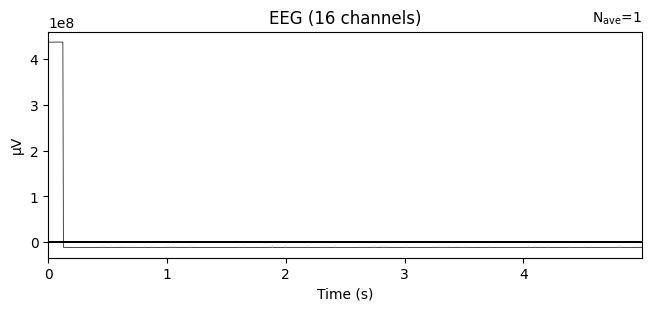

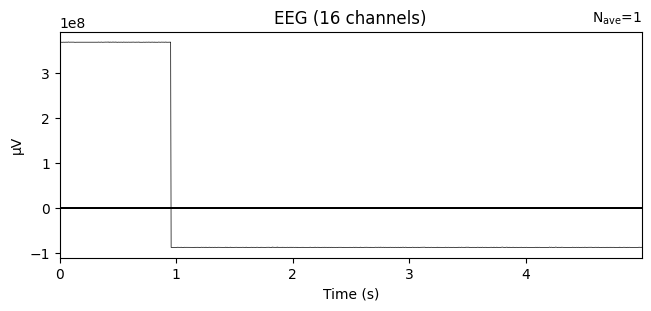

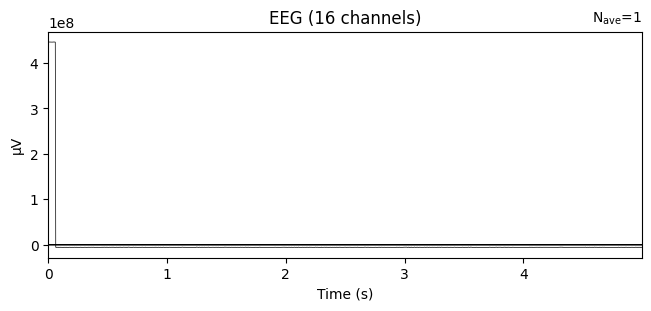

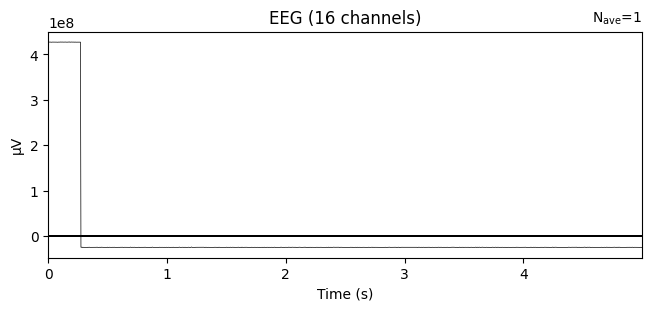

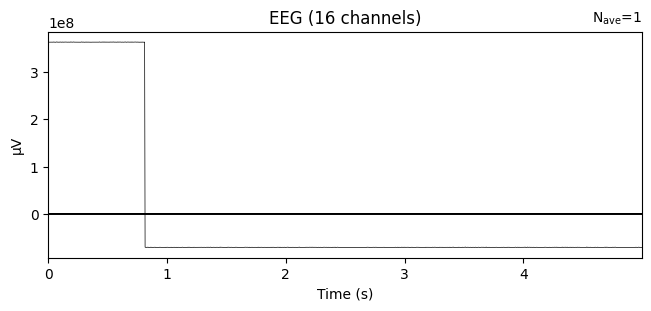

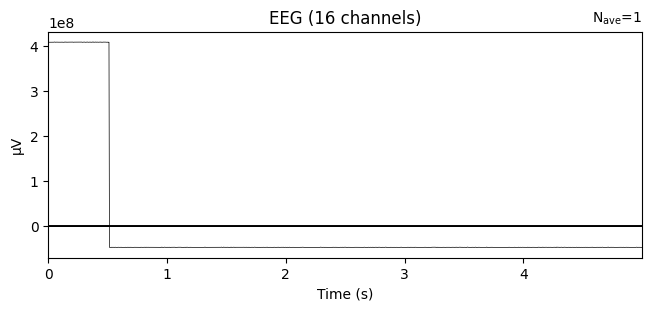

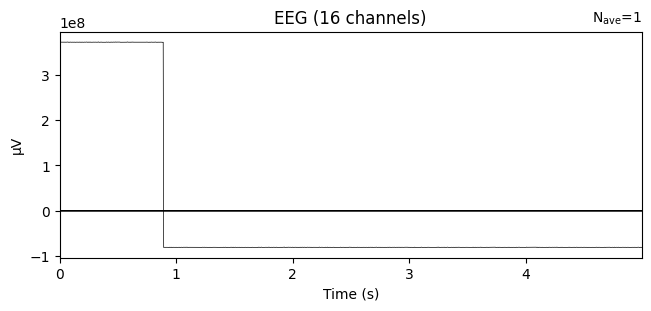

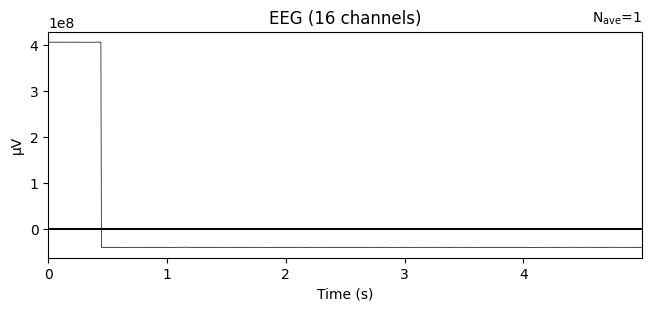

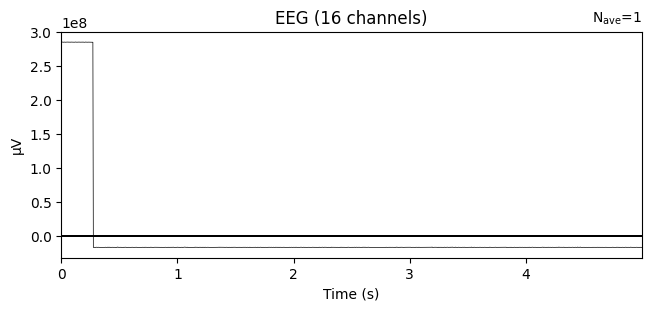

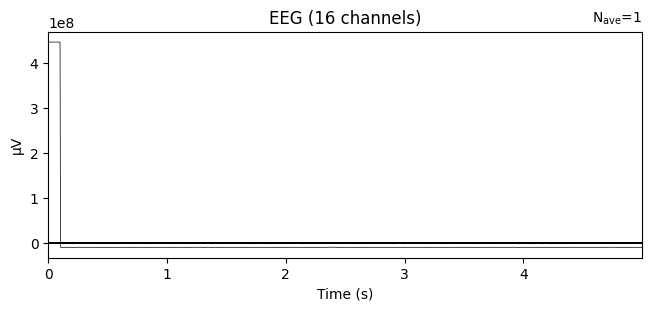

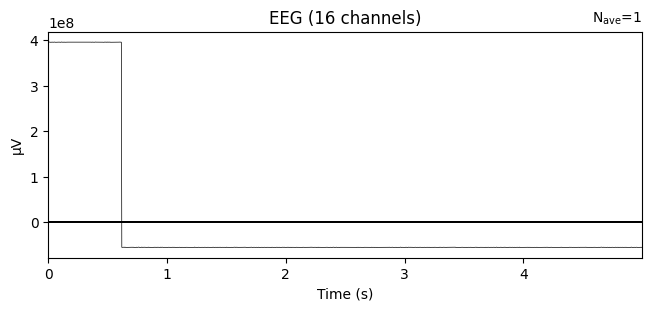

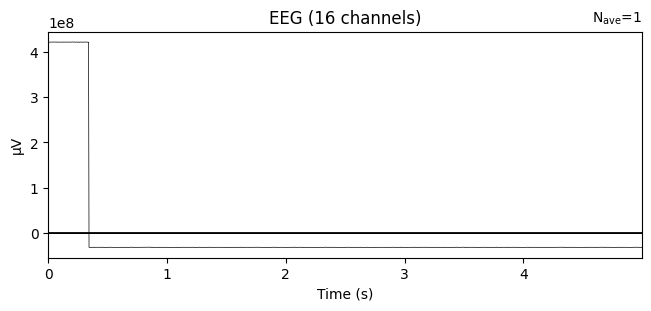

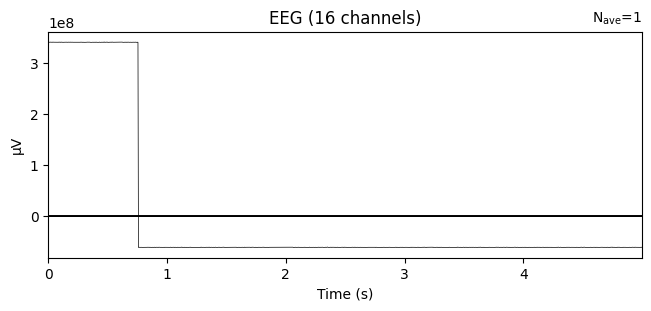

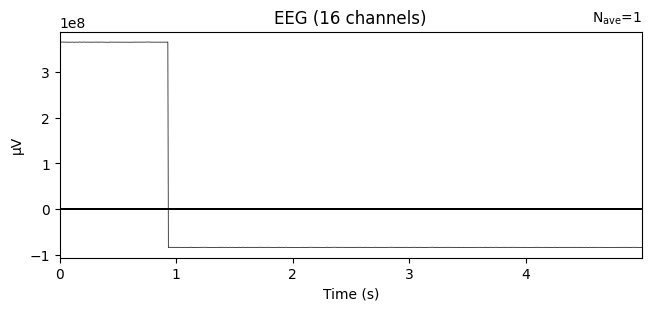

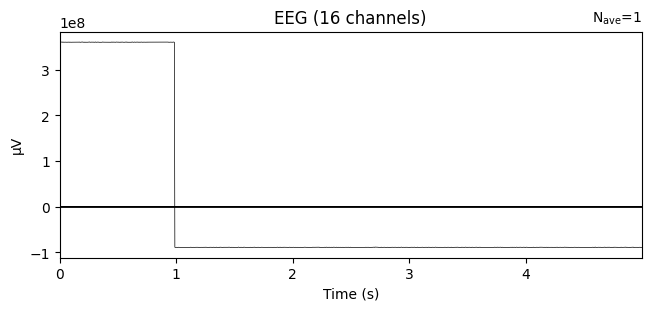

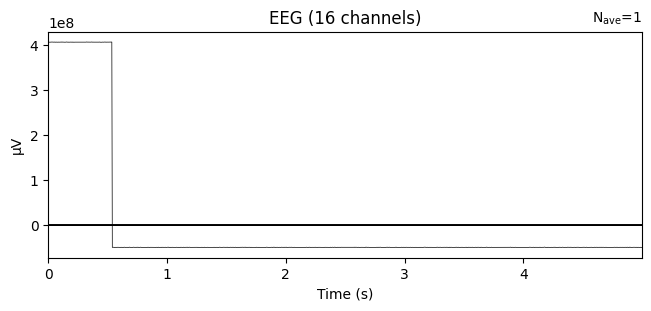

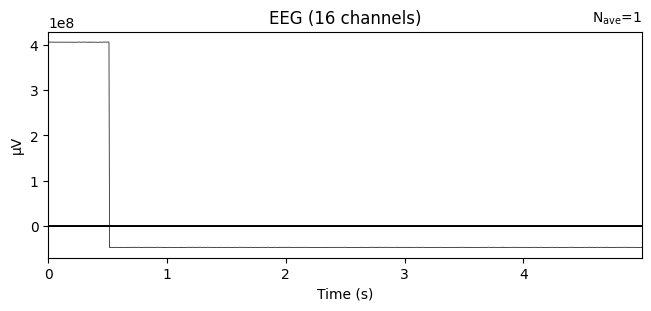

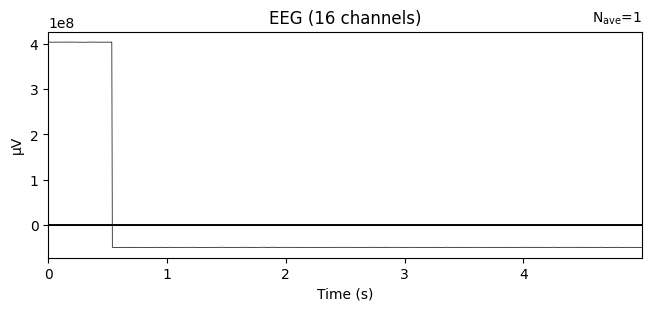

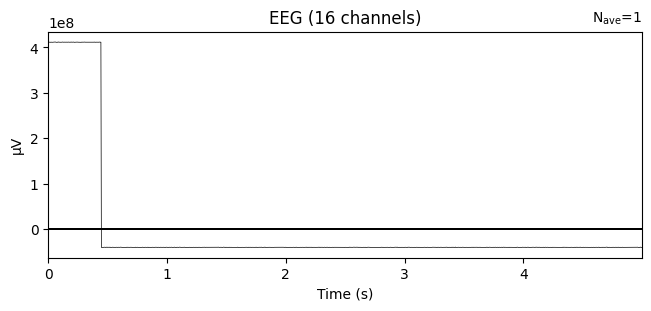

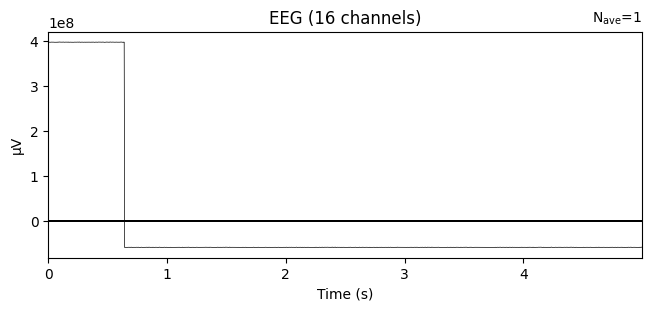

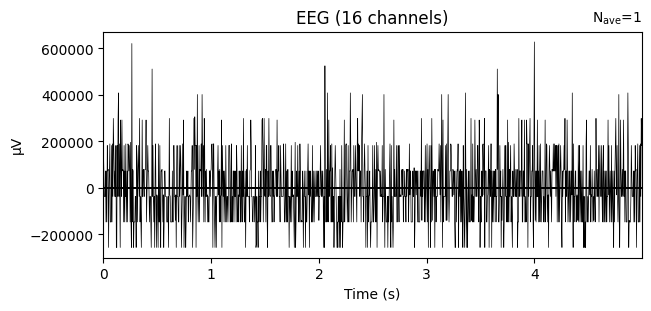

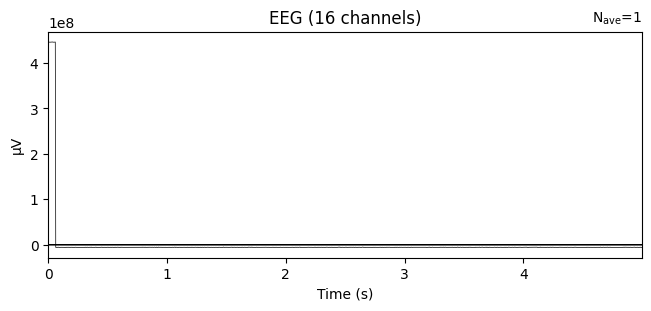

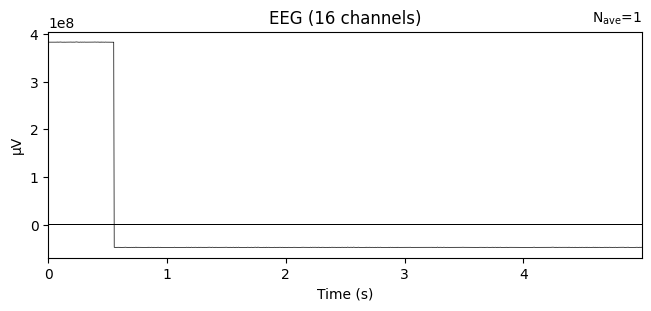

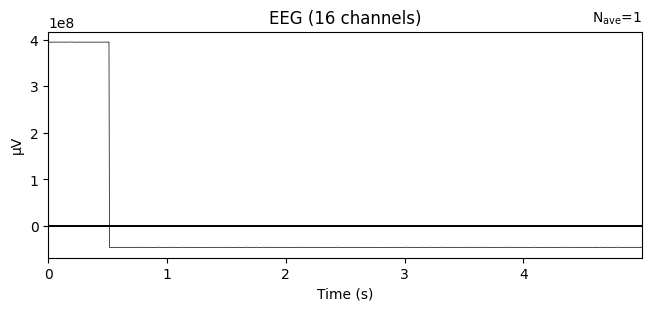

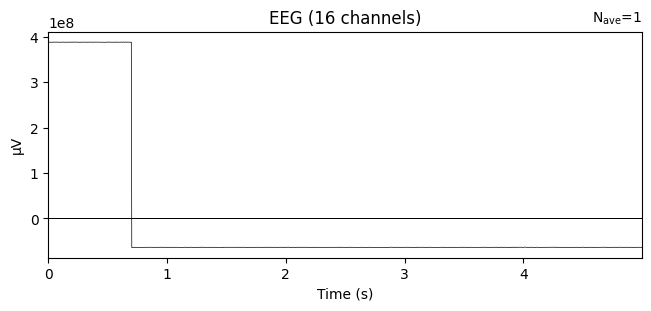

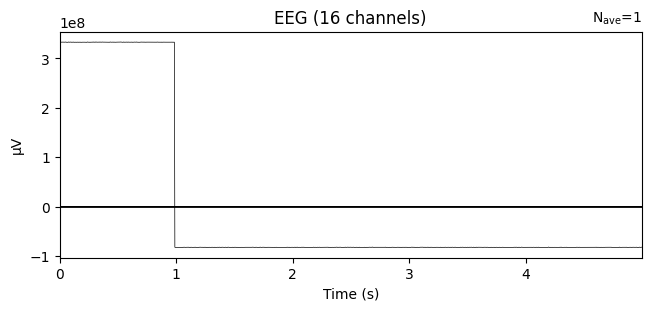

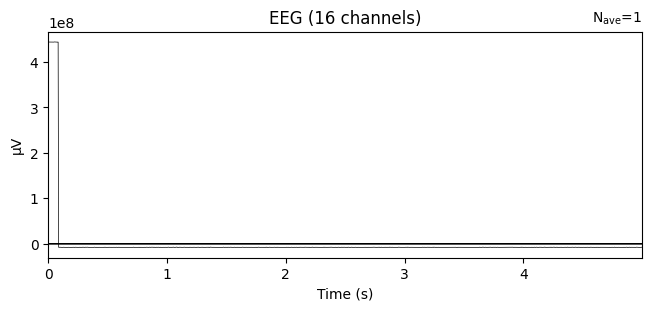

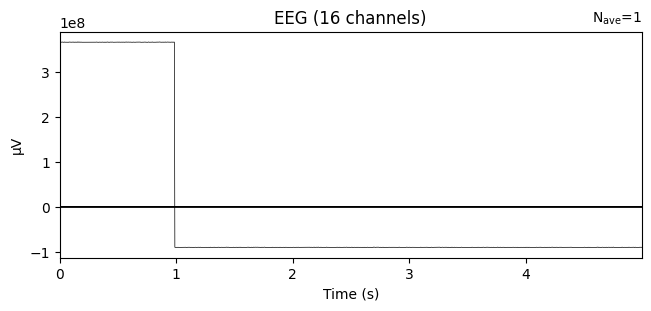

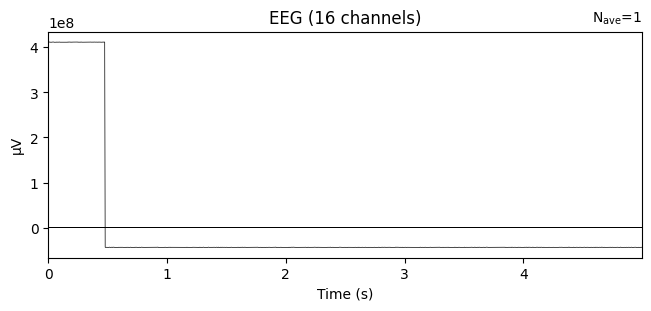

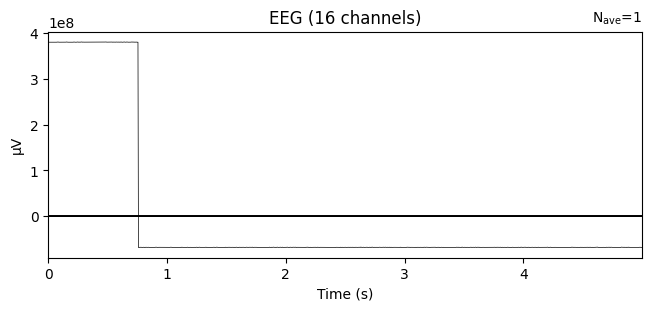

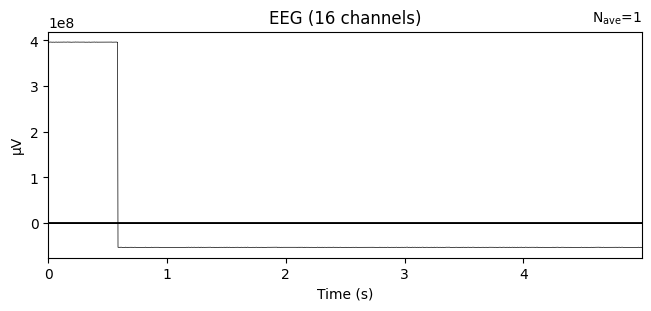

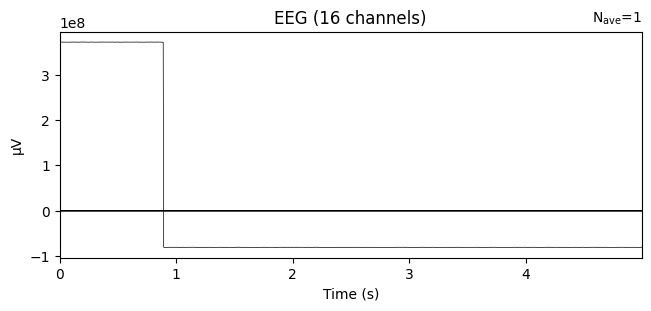

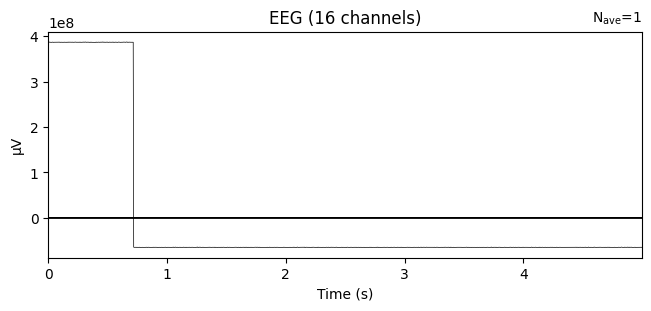

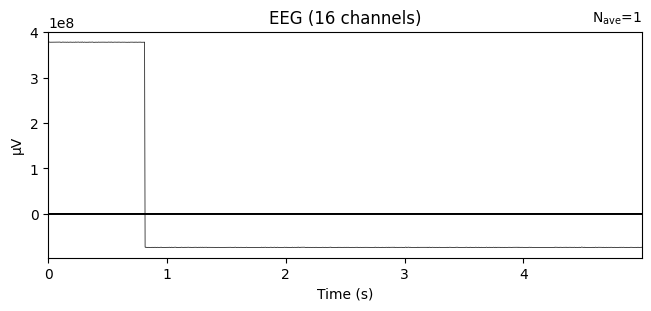

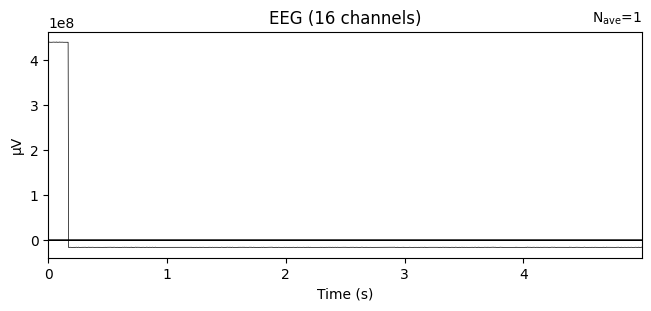

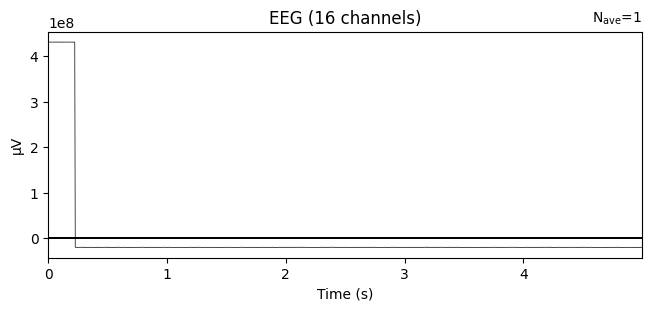

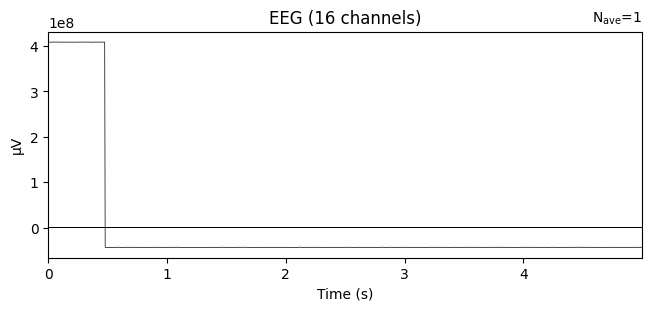

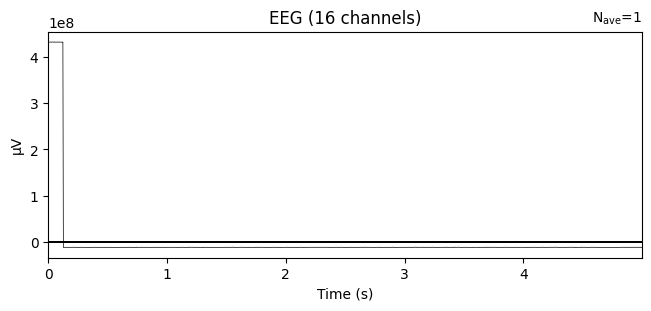

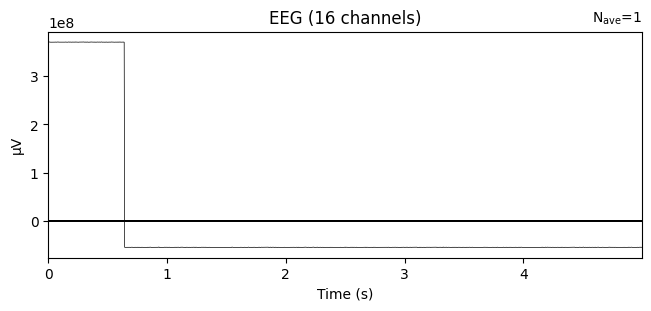

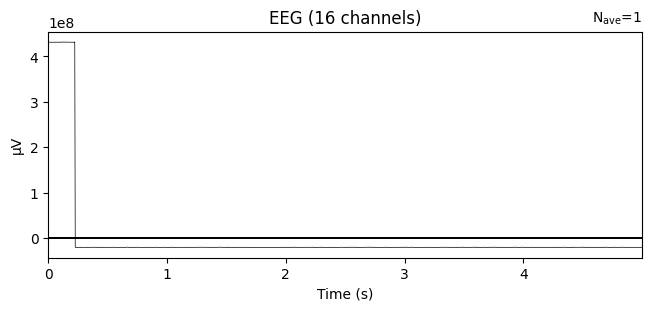

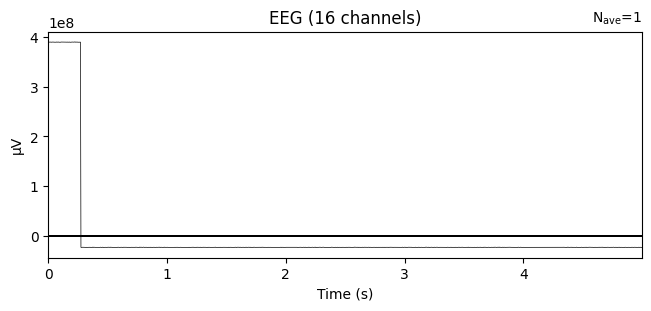

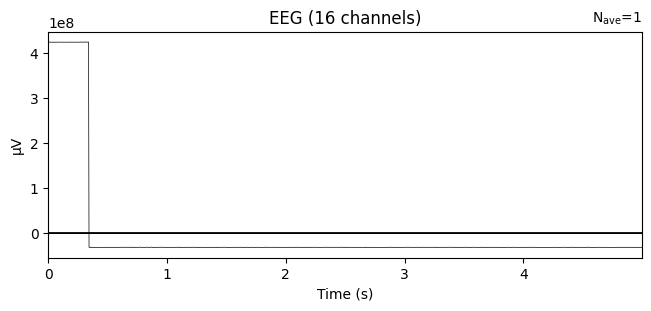

In [7]:
from glob import glob
import mne
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mne.decoding import UnsupervisedSpatialFilter

def clean_data(file_path):
    # Step 1: Load the data
    raw = mne.io.read_raw_bdf(file_path, preload=True)

    # Step 2: Set average as a reference
    raw.set_eeg_reference()

    # Step 3: Downsampling and Filter the data
    raw.resample(250)
    raw.filter(0.5, 25, fir_design='firwin')

    # Step 4: Segments the data into 5 sec with 10% overlap
    epochs = mne.make_fixed_length_epochs(raw, duration=5, overlap=0.1)

    # Step 5: Apply PCA
    pca = UnsupervisedSpatialFilter(PCA(16), average=False)
    X = epochs.get_data(copy=False)

    pca_data = pca.fit_transform(X)
    ev = mne.EvokedArray(
        np.mean(pca_data, axis=0),
        mne.create_info(16, epochs.info["sfreq"], ch_types="eeg")
    )

    # Plot PCA
    # ev.plot(show=False, window_title="PCA", time_unit="s")

    return pca_data

def read_data(filepaths, label):
    epochs_array = []
    epochs_label = []

    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):
        array = clean_data(file_path)
        epochs_array.append(array)
        epochs_label.extend([label] * len(array))

    return epochs_array, epochs_label



def process_filepaths(filepaths, label):
    epochs_array = []
    epochs_label = []
    for i in range(0, len(filepaths), chunk_size):
        chunk_filepaths = filepaths[i:i + chunk_size]
        chunk_array, chunk_label = read_data(chunk_filepaths, label=label)
        epochs_array.extend(chunk_array)
        epochs_label.extend(chunk_label)

        print(f"Processed {len(chunk_array)} samples for label {label}")
    return epochs_array, epochs_label

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP/GP-Data/Subjects/*.bdf')

# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array, haemorrhage_epochs_label = process_filepaths(haemorrhage_filepaths, label=0)
ischaemia_epochs_array, ischaemia_epochs_label = process_filepaths(ischaemia_filepaths, label=1)
subject_epochs_array, subject_epochs_label = process_filepaths(subject_filepaths, label=2)


In [8]:
# Combine epoch arrays for different classes into a single list
# Combine corresponding labels into a single list
data_list= haemorrhage_epochs_array + ischaemia_epochs_array + subject_epochs_array
label_list= haemorrhage_epochs_label + ischaemia_epochs_label + subject_epochs_label


# Print the lengths of the combined data and label lists for verification
print(len(data_list),len(label_list))

45 6682


In [9]:
# Create a list of groups, where each group corresponds to a class and has the same length as its respective data
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]

In [10]:
# Stack the data, labels, and groups into numpy arrays
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
# Move the axis to make the data suitable for input into a deep learning model (assuming a time series problem)
data_array=np.moveaxis(data_array,1,2)

# Print the shapes of the resulting arrays
print(data_array.shape,label_array.shape,group_array.shape)

(6682, 1250, 16) (6682,) (6682,)


In [12]:
# save scaled data
np.save('/content/drive/MyDrive/GP/Final Data/X_pca16.npy', data_array)
np.save('/content/drive/MyDrive/GP/Final Data/y_pca16.npy', label_array)
np.save('/content/drive/MyDrive/GP/Final Data/g_pca16.npy', group_array)

# Models Training



## Define Functions/Classes

In [27]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import StandardScaler
import numpy as np

gkf=GroupKFold()
# This function to standerd scale 3D data
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)



def three_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      train_features, train_label = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      train_features=scaler.fit_transform(train_features)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  # Split train_features into train and val
  for train_index, val_index in gkf.split(train_features, train_label, groups= train_groups):
      X_train, y_train =train_features[train_index],train_label[train_index]
      X_val, y_val =train_features[val_index],train_label[val_index]

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[val_index])}")

      break

  return X_train, X_val, X_test, y_train, y_val, y_test




def two_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  return X_train, X_test, y_train, y_test, train_groups


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



def fit_and_evaluate(X_train, y_train, X_test, y_test,model):

  model.fit(X_train, y_train)

  # Predictions on the test set
  y_pred = model.predict(X_test)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')


  # Print the results
  print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F1-score:", f1)


  print("Classification Report (Test):\n", classification_report(y_test, y_pred))

  # Compute the confusion matrix for the test set
  cm_test = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix for the test set
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix for Decision Tree {model.__class__}")
  plt.show()

  return model




def evaluate(model, X_test, y_test):

  # Predictions on the test set
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5).astype(int)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')


  # Print the results
  print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F1-score:", f1)


  print("Classification Report (Test):\n", classification_report(y_test, y_pred))

  # Compute the confusion matrix for the test set
  cm_test = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix for the test set
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix for Decision Tree {model.__class__}")
  plt.show()

  return



def plot_history(hist):
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

## Prepare the data

In [30]:
# Step 1: Load the data
X = np.load('/content/drive/MyDrive/GP/Final Data/X_pca16.npy')
y = np.load('/content/drive/MyDrive/GP/Final Data/y_pca16.npy')
g = np.load('/content/drive/MyDrive/GP/Final Data/g_pca16.npy')

y = y.astype('int')

print(X.shape, y.shape, g.shape)


# Step 2: Split the data into train and test , and normalize the data using standerd scale
X_train, X_test, y_train, y_test, X_group = two_splits(X , y, g)
# X_train, X_val, X_test, y_train, y_val, y_test = three_splits(data_array , label_array, group_array)



# Step 3: Convert multicalss to binary
y_train[y_train==0] = 1
y_train[y_train==2] = 0

y_test[y_test==0] = 1
y_test[y_test==2] = 0

# y_val[y_val==0] = 1
# y_val[y_val==2] = 0


(6682, 1250, 16) (6682,) (6682,)
group=[ 0  1  2  3  4  5  6  7  8  9 10 13 15 16 17 18 20 21 24 25 27 28 29 30
 31 32 33 34 36 37 39 40 41 42 43 44]
group=[11 12 14 19 22 23 26 35 38]


## ML Models


In [18]:
# Flatten the data array for ML models
X_train_ml = X_train.reshape(X_train.shape[0], -1)
X_test_ml = X_test.reshape(X_test.shape[0], -1)
# X_val_ml = X_val.reshape(X_val.shape[0], -1)

y_train_ml = y_train.reshape(y_train.shape[0], -1)
y_test_ml = y_test.reshape(y_test.shape[0], -1)
# y_val_ml = y_val.reshape(y_val.shape[0], -1)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.5152173913043478
Recall: 0.5152173913043478
Precision: 0.5660938985340471
F1-score: 0.5311998539987982
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.32      0.46      0.38       439
           1       0.68      0.54      0.60       941

    accuracy                           0.52      1380
   macro avg       0.50      0.50      0.49      1380
weighted avg       0.57      0.52      0.53      1380



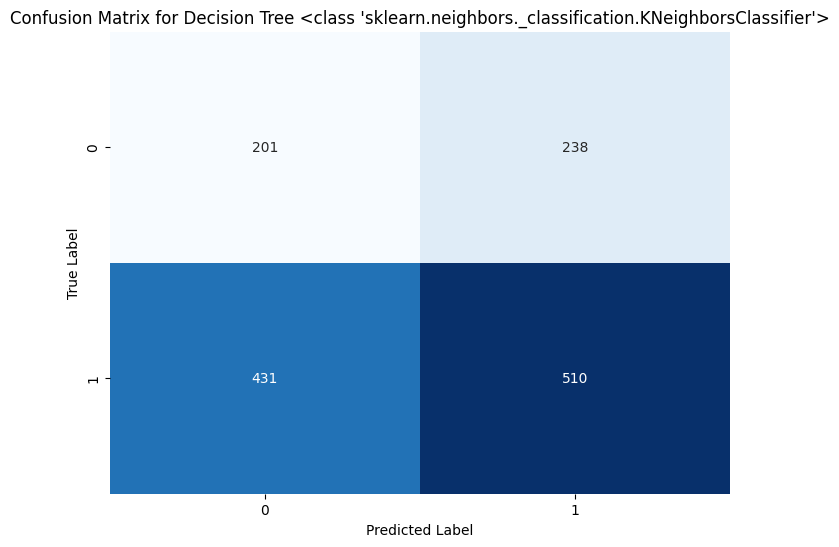

In [19]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml , y_test_ml,
                       KNeighborsClassifier(algorithm='auto', n_neighbors=15, weights='uniform'))

<ipython-input-14-ca6fb9f45d03>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.5818840579710145
Recall: 0.5818840579710145
Precision: 0.6462181190106702
F1-score: 0.5962048651998054
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.40      0.62      0.49       439
           1       0.76      0.56      0.65       941

    accuracy                           0.58      1380
   macro avg       0.58      0.59      0.57      1380
weighted avg       0.65      0.58      0.60      1380



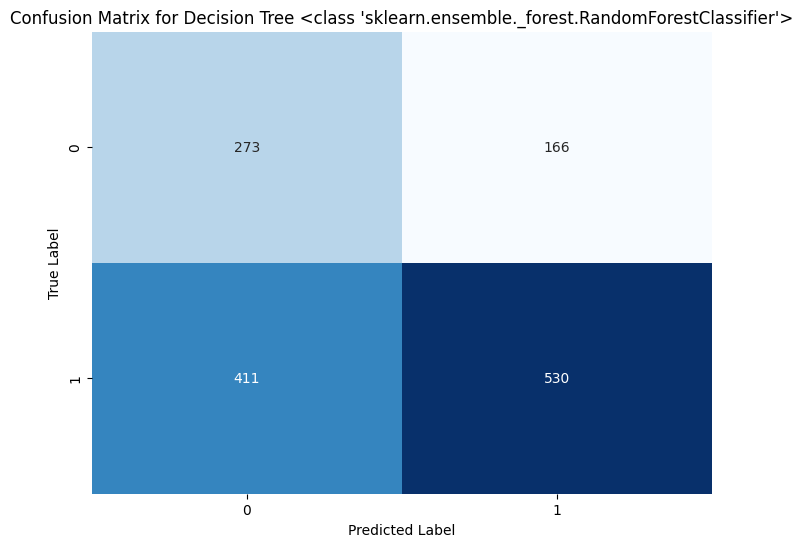

In [20]:
# RF

from sklearn.ensemble import RandomForestClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml,X_test_ml , y_test_ml,
                       RandomForestClassifier(n_estimators=50, max_depth=9, max_leaf_nodes = 6))

Accuracy: 0.6550724637681159
Recall: 0.6550724637681159
Precision: 0.6904356050796728
F1-score: 0.66530117189947
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.47      0.63      0.54       439
           1       0.79      0.67      0.73       941

    accuracy                           0.66      1380
   macro avg       0.63      0.65      0.63      1380
weighted avg       0.69      0.66      0.67      1380



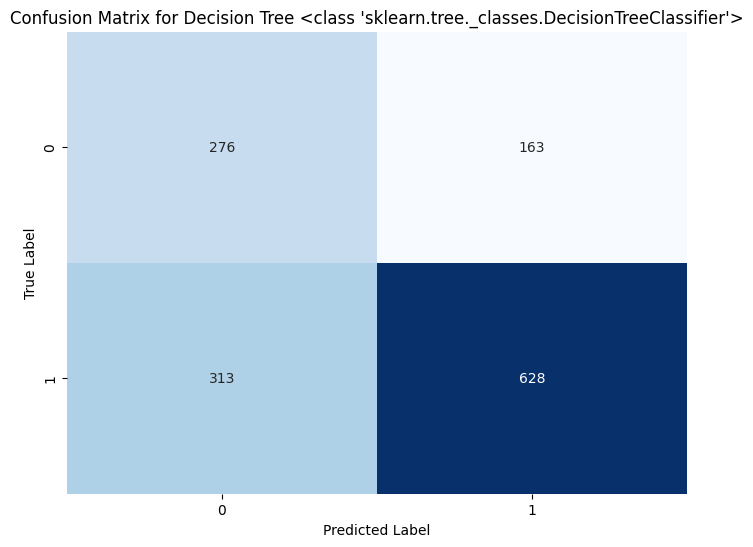

In [21]:
# DT

from sklearn.tree import DecisionTreeClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml,X_test_ml , y_test_ml,
                       DecisionTreeClassifier(criterion = 'gini', max_depth=10, min_samples_leaf = 5))

Accuracy: 0.6007246376811595
Recall: 0.6007246376811595
Precision: 0.6675230704902286
F1-score: 0.6143770278528865
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.42      0.66      0.51       439
           1       0.78      0.57      0.66       941

    accuracy                           0.60      1380
   macro avg       0.60      0.62      0.59      1380
weighted avg       0.67      0.60      0.61      1380



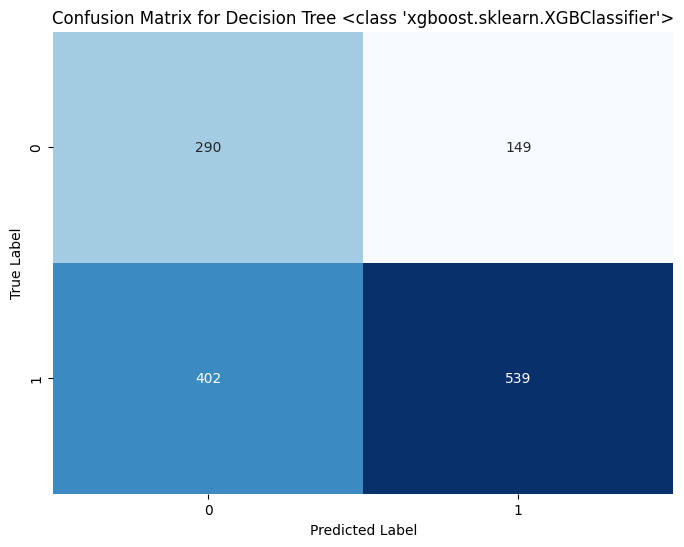

In [22]:
# XGBoost

from xgboost import XGBClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml,X_test_ml , y_test_ml,
                       XGBClassifier(n_estimators=200, max_depth=9, learning_rate = 0.01))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5876811594202899
Recall: 0.5876811594202899
Precision: 0.6569760077944221
F1-score: 0.6017281726348559
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.41      0.65      0.50       439
           1       0.77      0.56      0.65       941

    accuracy                           0.59      1380
   macro avg       0.59      0.60      0.57      1380
weighted avg       0.66      0.59      0.60      1380



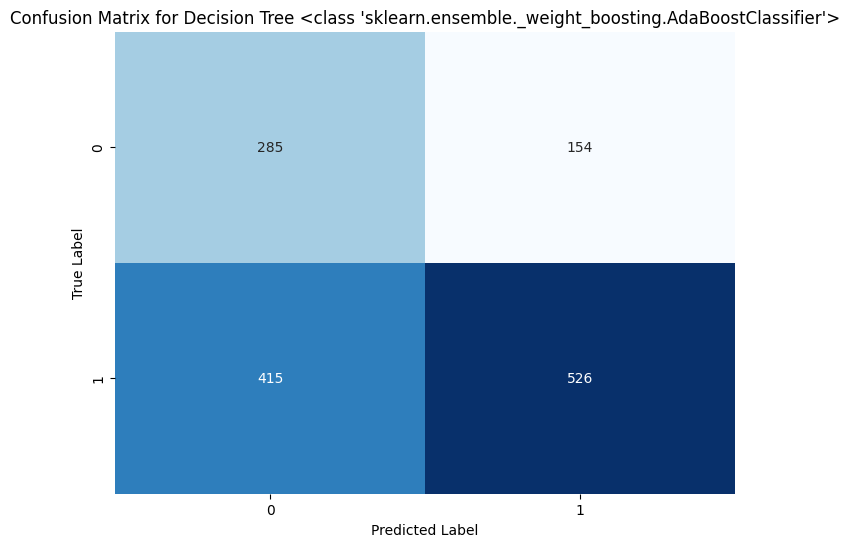

In [23]:
# Adaboost

from sklearn.ensemble import AdaBoostClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml, y_test_ml,
                       AdaBoostClassifier(n_estimators=200, learning_rate = 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 2945, number of negative: 2357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.671282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100000
[LightGBM] [Info] Number of data points in the train set: 5302, number of used features: 20000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555451 -> initscore=0.222719
[LightGBM] [Info] Start training from score 0.222719
Accuracy: 0.5905797101449275
Recall: 0.5905797101449275
Precision: 0.6631074419695765
F1-score: 0.6044260524236248
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.41      0.67      0.51       439
           1       0.78      0.56      0.65       941

    accuracy                           0.59      1380
   macro avg       0.60      0.61      0.58      1380
weighted avg       0.66      0.59      0.60      1380



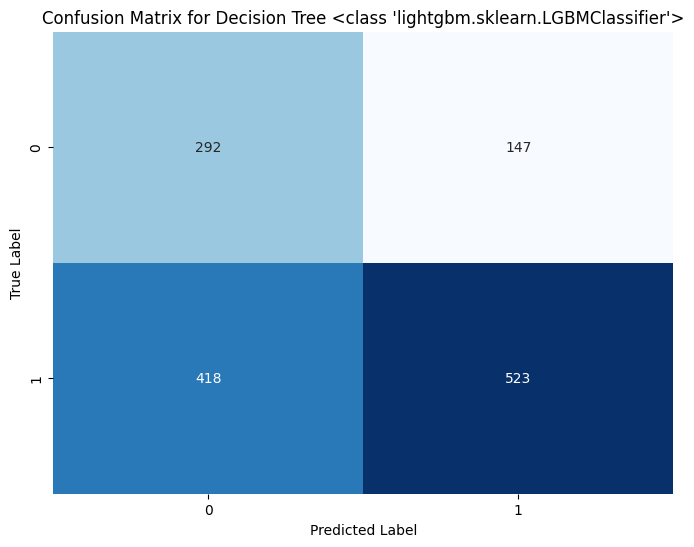

In [24]:
# LightGBM

from lightgbm import LGBMClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml, y_test_ml,
                       LGBMClassifier(learning_rate = 0.01, n_estimators = 200,
                                      max_depth = -1, subsample = 0.8, colsample_bytree = 0.8))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.636231884057971
Recall: 0.636231884057971
Precision: 0.6765641007808546
F1-score: 0.6475573013803899
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.45      0.62      0.52       439
           1       0.78      0.65      0.71       941

    accuracy                           0.64      1380
   macro avg       0.62      0.63      0.61      1380
weighted avg       0.68      0.64      0.65      1380



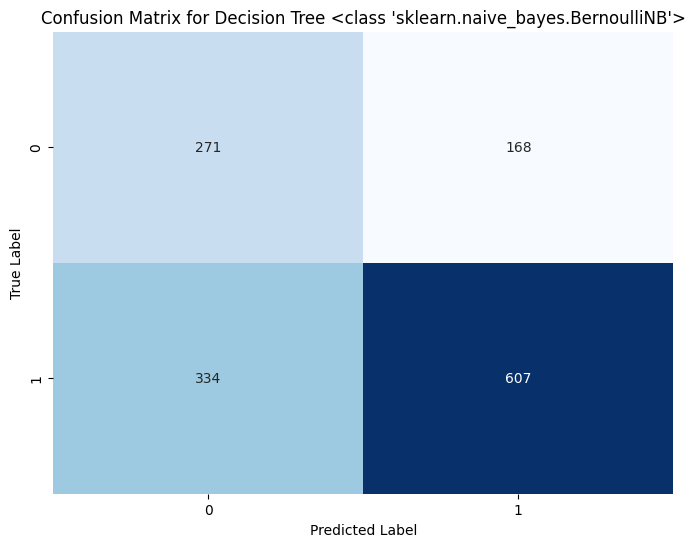

In [25]:
# Bernoulli NB

from sklearn.naive_bayes import BernoulliNB
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml, y_test_ml,
                       BernoulliNB(alpha = 0.1, binarize = 0.0, fit_prior = True))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.33695652173913043
Recall: 0.33695652173913043
Precision: 0.45415837623945726
F1-score: 0.3146370783710937
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.27      0.65      0.38       439
           1       0.54      0.19      0.28       941

    accuracy                           0.34      1380
   macro avg       0.41      0.42      0.33      1380
weighted avg       0.45      0.34      0.31      1380



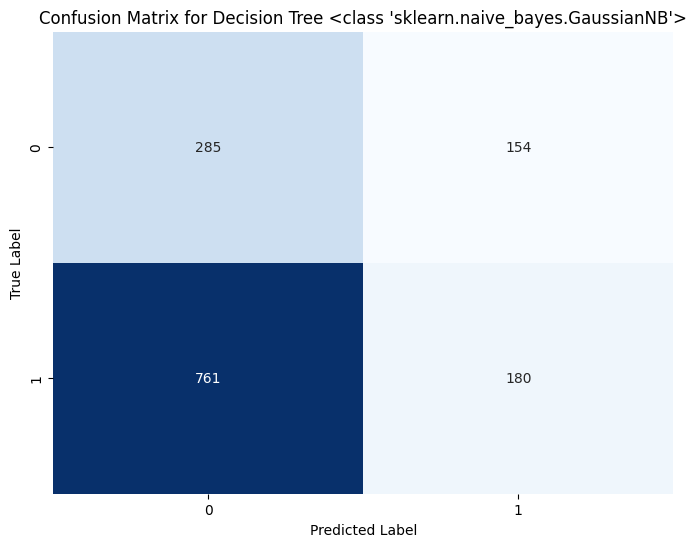

In [26]:
# Gaussian NB

# *** Gaussian NB parameters is not reported ***


from sklearn.naive_bayes import GaussianNB
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml, y_test_ml,
                       GaussianNB())

## DL Models

In [31]:
X_train_dl, X_val, y_train_dl, y_val, _ = two_splits(X_train, y_train, X_group)

X_train_dl.shape, X_val.shape, y_train_dl.shape, y_test.shape

group=[ 0  2  3  4  5  6  7  8  9 13 17 20 21 24 25 27 28 30 31 32 33 34 36 39
 40 41 42 43 44]
group=[ 1 10 15 16 18 29 37]


((4268, 1250, 16), (1034, 1250, 16), (4268,), (1380,))

### CNN

Epoch 1/70
67/67 [==============================] - 11s 118ms/step - loss: 0.6893 - accuracy: 0.5091 - val_loss: 0.5956 - val_accuracy: 0.6944
Epoch 2/70
67/67 [==============================] - 7s 106ms/step - loss: 0.6708 - accuracy: 0.5419 - val_loss: 0.5983 - val_accuracy: 0.7302
Epoch 3/70
67/67 [==============================] - 7s 111ms/step - loss: 0.6569 - accuracy: 0.5808 - val_loss: 0.6040 - val_accuracy: 0.7679
Epoch 4/70
67/67 [==============================] - 7s 107ms/step - loss: 0.6422 - accuracy: 0.6446 - val_loss: 0.6039 - val_accuracy: 0.7573
Epoch 5/70
67/67 [==============================] - 7s 111ms/step - loss: 0.6252 - accuracy: 0.6844 - val_loss: 0.5431 - val_accuracy: 0.8211
Epoch 6/70
67/67 [==============================] - 7s 106ms/step - loss: 0.6016 - accuracy: 0.7113 - val_loss: 0.5367 - val_accuracy: 0.7979
Epoch 7/70
67/67 [==============================] - 7s 112ms/step - loss: 0.5682 - accuracy: 0.7388 - val_loss: 0.5147 - val_accuracy: 0.8037
Epoch

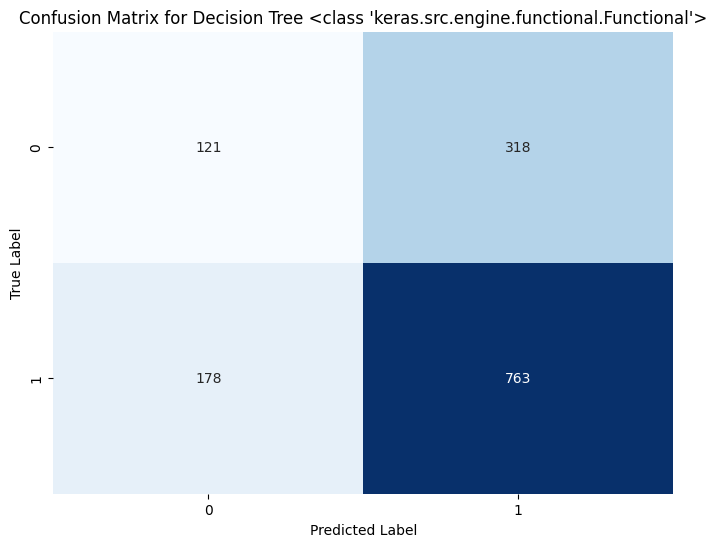

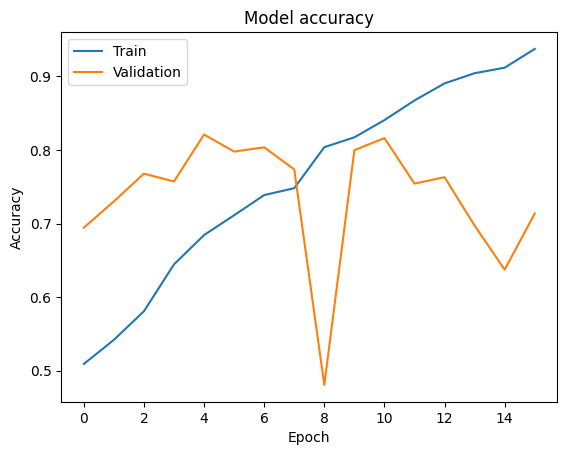

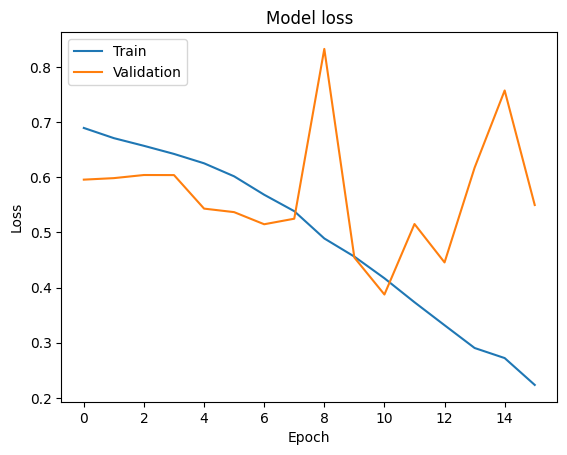

In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping

def block(input):
    conv1 = Conv1D(32, 2, strides=2, activation='relu', padding="same")(input)
    conv2 = Conv1D(32, 4, strides=2, activation='relu', padding="causal")(input)
    conv3 = Conv1D(32, 8, strides=2, activation='relu', padding="causal")(input)
    x = concatenate([conv1, conv2, conv3], axis=2)
    return x

# Define the input layer with a shape of (1250, 16)
input_layer = Input(shape=(1250, 16))

# Create the first block
block1 = block(input_layer)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

cnn_out1 = Conv1D(32, 3, activation='relu', padding='same')(block3)
cnn_out2 = Conv1D(32, 3, activation='relu', padding='same')(cnn_out1)
cnn_out3 = MaxPooling1D(pool_size=2)(cnn_out2)
cnn_out4 = Flatten()(cnn_out3)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(cnn_out4)

# Define the model with 'input_layer' as the input and 'predictions' as the output
model = Model(inputs=input_layer, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using training features and labels
hist = model.fit(X_train_dl, y_train_dl, epochs=70, batch_size=64,
                 validation_data=(X_val, y_val), callbacks=[early_stopping])

# evaluate the model
evaluate(model, X_test, y_test)


# plot model accuracy and loss of training and validation
plot_history(hist)

### LSTM

Epoch 1/30
34/34 [==============================] - 125s 4s/step - loss: 0.6976 - accuracy: 0.5199 - val_loss: 0.6638 - val_accuracy: 0.6489
Epoch 2/30
34/34 [==============================] - 121s 4s/step - loss: 0.6882 - accuracy: 0.5373 - val_loss: 0.6362 - val_accuracy: 0.7205
Epoch 3/30
34/34 [==============================] - 123s 4s/step - loss: 0.6986 - accuracy: 0.5012 - val_loss: 0.7012 - val_accuracy: 0.2872
Epoch 4/30
34/34 [==============================] - 130s 4s/step - loss: 0.6959 - accuracy: 0.5016 - val_loss: 0.6620 - val_accuracy: 0.7108
Epoch 5/30
34/34 [==============================] - 125s 4s/step - loss: 0.6949 - accuracy: 0.5131 - val_loss: 0.6922 - val_accuracy: 0.7099
Epoch 6/30
34/34 [==============================] - 124s 4s/step - loss: 0.6938 - accuracy: 0.5047 - val_loss: 0.6666 - val_accuracy: 0.7128
Epoch 7/30
44/44 [==============================] - 24s 524ms/step
Accuracy: 0.6818840579710145
Recall: 0.6818840579710145
Precision: 0.46496586851501787


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

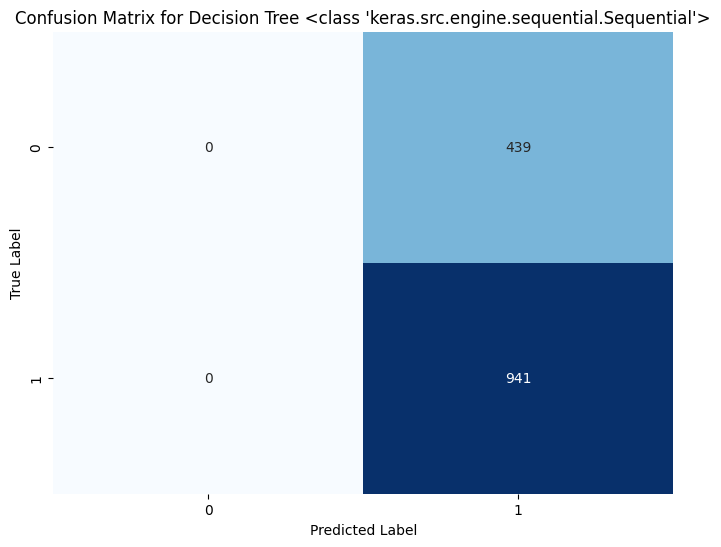

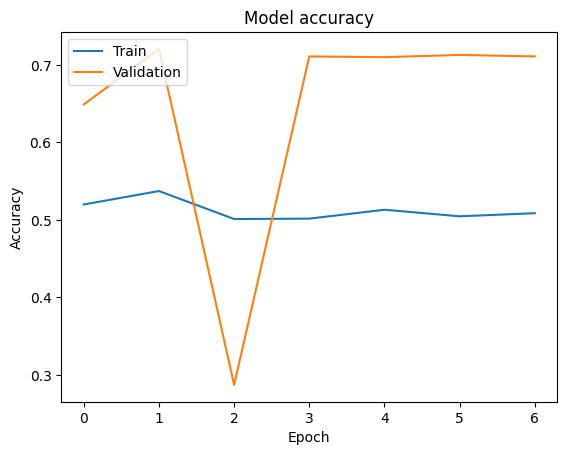

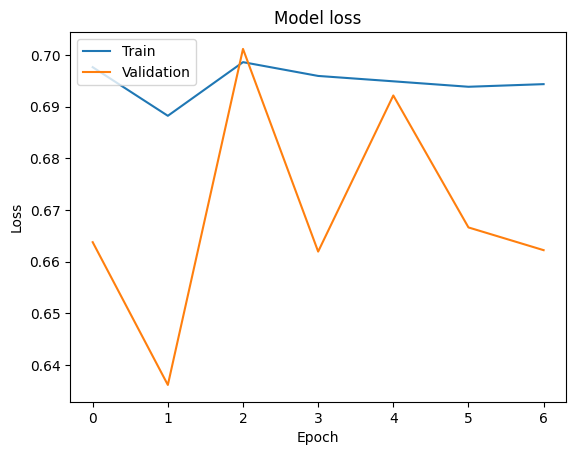

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam

model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (1250, 16)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(X_train_dl, y_train_dl, epochs=30, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
evaluate(model, X_test, y_test)

# Plot the history
plot_history(hist)

### CNN+LSTM

Epoch 1/70
67/67 [==============================] - 33s 443ms/step - loss: 0.6883 - accuracy: 0.5419 - val_loss: 0.6001 - val_accuracy: 0.7863
Epoch 2/70
67/67 [==============================] - 28s 423ms/step - loss: 0.6467 - accuracy: 0.6296 - val_loss: 0.5738 - val_accuracy: 0.7766
Epoch 3/70
67/67 [==============================] - 28s 419ms/step - loss: 0.6271 - accuracy: 0.6666 - val_loss: 0.6874 - val_accuracy: 0.5193
Epoch 4/70
67/67 [==============================] - 29s 427ms/step - loss: 0.6143 - accuracy: 0.6755 - val_loss: 0.7602 - val_accuracy: 0.5309
Epoch 5/70
67/67 [==============================] - 28s 422ms/step - loss: 0.6663 - accuracy: 0.6197 - val_loss: 0.6967 - val_accuracy: 0.5590
Epoch 6/70
67/67 [==============================] - 28s 423ms/step - loss: 0.6792 - accuracy: 0.5558 - val_loss: 0.6114 - val_accuracy: 0.6576
Epoch 7/70
44/44 [==============================] - 5s 96ms/step
Accuracy: 0.6079710144927536
Recall: 0.6079710144927536
Precision: 0.60295064

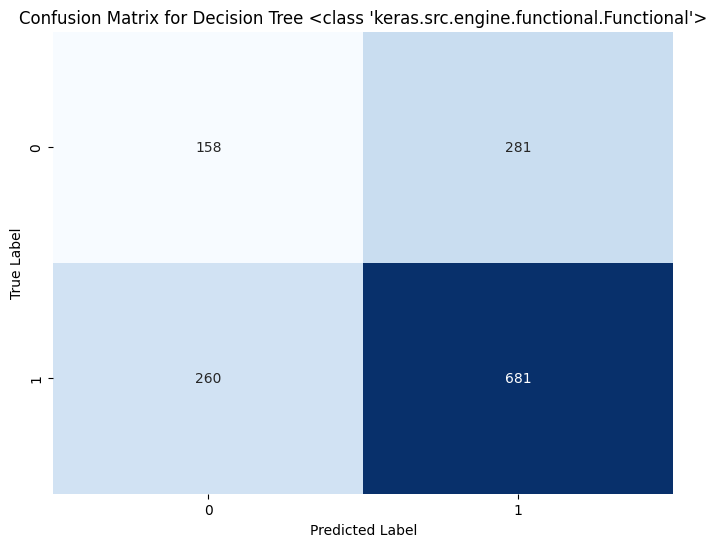

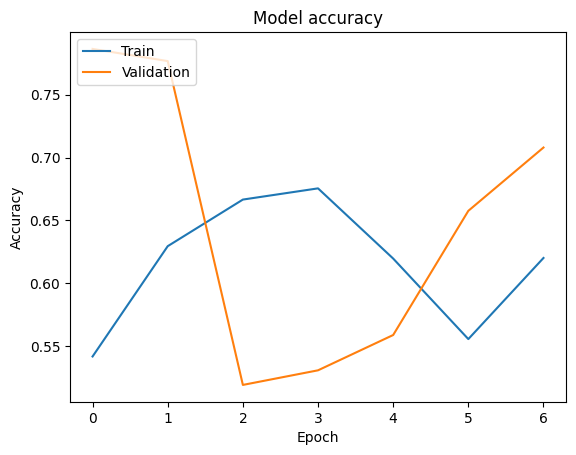

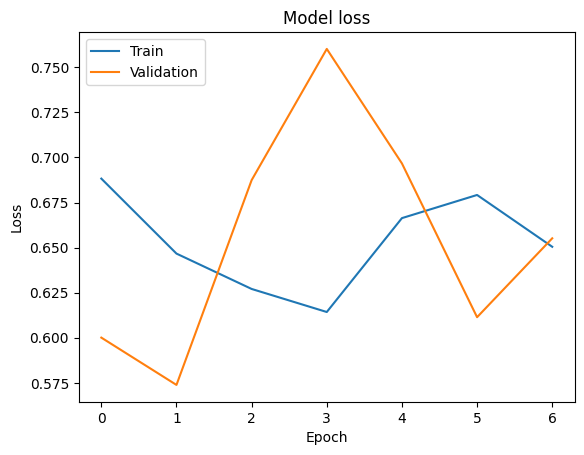

In [45]:
from tensorflow.keras.layers import Input, Conv1D, concatenate, Dense, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

# Define the input layer with a shape of (1250, 33)
input_layer = Input(shape=(1250, 16))

# Convolutional Block
conv1 = Conv1D(32, 2, strides=2, activation='relu', padding="same")(input_layer)
conv2 = Conv1D(32, 4, strides=2, activation='relu', padding="causal")(input_layer)
conv3 = Conv1D(32, 8, strides=2, activation='relu', padding="causal")(input_layer)
cnn_output = concatenate([conv1, conv2, conv3], axis=2)

# LSTM Layer
lstm_layer = LSTM(64)(cnn_output)

# Fully Connected Layers
dense1 = Dense(32, activation='tanh')(lstm_layer)

# Output Layer
predictions = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


hist = model.fit(X_train_dl, y_train_dl, epochs=70,
                 batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
evaluate(model, X_test, y_test)

# Plot the history
plot_history(hist)

### CNN+GRU

Epoch 1/70
67/67 [==============================] - 38s 427ms/step - loss: 0.6799 - accuracy: 0.5808 - val_loss: 0.6773 - val_accuracy: 0.5967
Epoch 2/70
67/67 [==============================] - 26s 393ms/step - loss: 0.6371 - accuracy: 0.6375 - val_loss: 0.6672 - val_accuracy: 0.6209
Epoch 3/70
67/67 [==============================] - 27s 410ms/step - loss: 0.5423 - accuracy: 0.7427 - val_loss: 0.7011 - val_accuracy: 0.6161
Epoch 4/70
67/67 [==============================] - 27s 410ms/step - loss: 0.2319 - accuracy: 0.9152 - val_loss: 0.7464 - val_accuracy: 0.7166
Epoch 5/70
67/67 [==============================] - 27s 399ms/step - loss: 0.1261 - accuracy: 0.9562 - val_loss: 0.6851 - val_accuracy: 0.7437
Epoch 6/70
67/67 [==============================] - 27s 401ms/step - loss: 0.0469 - accuracy: 0.9885 - val_loss: 0.6828 - val_accuracy: 0.7485
Epoch 7/70
44/44 [==============================] - 5s 77ms/step
Accuracy: 0.44855072463768114
Recall: 0.44855072463768114
Precision: 0.568985

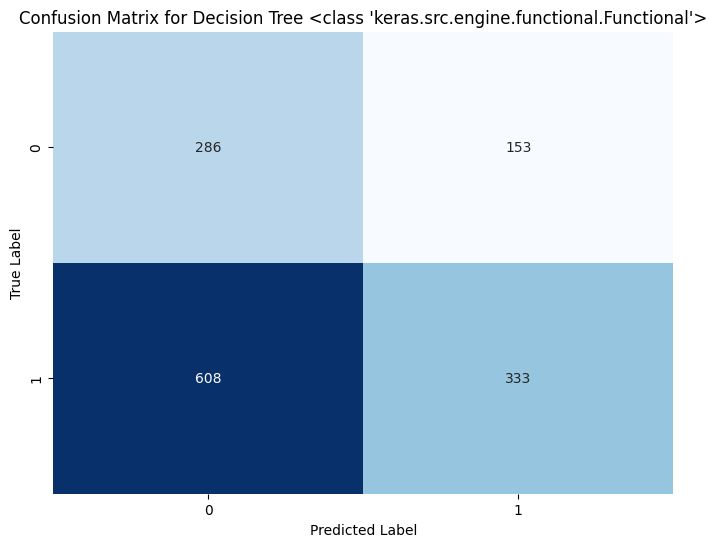

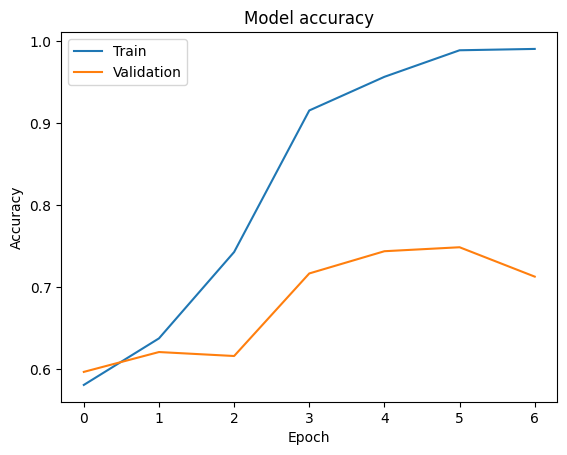

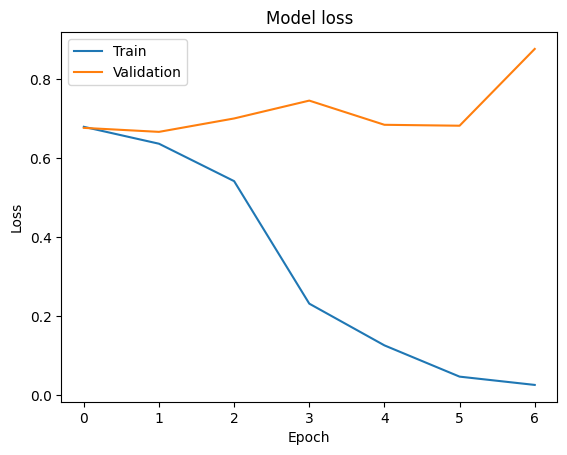

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#resource:https://github.com/dll-ncai/eeg_pre-diagnostic_screening/blob/master/code/chrononet/chrono.py

def block(input):

  """
    Create a block consisting of three parallel convolutional layers followed by concatenation.

    Parameters:
    - input: Input tensor.

    Returns:
    - Concatenated tensor resulting from the parallel convolutional layers.
    """

  conv1 = Conv1D(32, 2, strides=2,activation='relu',padding="same")(input)
  conv2 = Conv1D(32, 4, strides=2,activation='relu',padding="causal")(input)
  conv3 = Conv1D(32, 8, strides=2,activation='relu',padding="causal")(input)
  x = concatenate([conv1,conv2,conv3],axis=2)
  return x

# Define the input layer with a shape of (1250, 33)
input = Input(shape=(1250, 16))

# Create the first block
block1 = block(input)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

gru_out1 = GRU(32,activation='tanh',return_sequences=True)(block3)
gru_out2 = GRU(32,activation='tanh',return_sequences=True)(gru_out1)
gru_out = concatenate([gru_out1,gru_out2],axis=2)
gru_out3 = GRU(32,activation='tanh',return_sequences=True)(gru_out)
gru_out = concatenate([gru_out1,gru_out2,gru_out3])
gru_out4 = GRU(32,activation='tanh')(gru_out)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(gru_out4)

# Define the model with 'input' as the input and 'predictions' as the output
model = Model(inputs=input, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(X_train_dl, y_train_dl, epochs=70, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
evaluate(model, X_test, y_test)

# Plot the history
plot_history(hist)

### RNN

Epoch 1/70
67/67 [==============================] - 72s 1s/step - loss: 0.7121 - accuracy: 0.4941 - val_loss: 0.7194 - val_accuracy: 0.4758
Epoch 2/70
67/67 [==============================] - 70s 1s/step - loss: 0.6835 - accuracy: 0.5612 - val_loss: 0.6952 - val_accuracy: 0.5416
Epoch 3/70
67/67 [==============================] - 71s 1s/step - loss: 0.6674 - accuracy: 0.5996 - val_loss: 0.6830 - val_accuracy: 0.5532
Epoch 4/70
67/67 [==============================] - 70s 1s/step - loss: 0.6598 - accuracy: 0.6193 - val_loss: 0.6835 - val_accuracy: 0.5551
Epoch 5/70
67/67 [==============================] - 70s 1s/step - loss: 0.6512 - accuracy: 0.6338 - val_loss: 0.6789 - val_accuracy: 0.5648
Epoch 6/70
67/67 [==============================] - 70s 1s/step - loss: 0.6394 - accuracy: 0.6544 - val_loss: 0.6705 - val_accuracy: 0.5851
Epoch 7/70
67/67 [==============================] - 71s 1s/step - loss: 0.6304 - accuracy: 0.6666 - val_loss: 0.6662 - val_accuracy: 0.5938
Epoch 8/70
67/67 [==

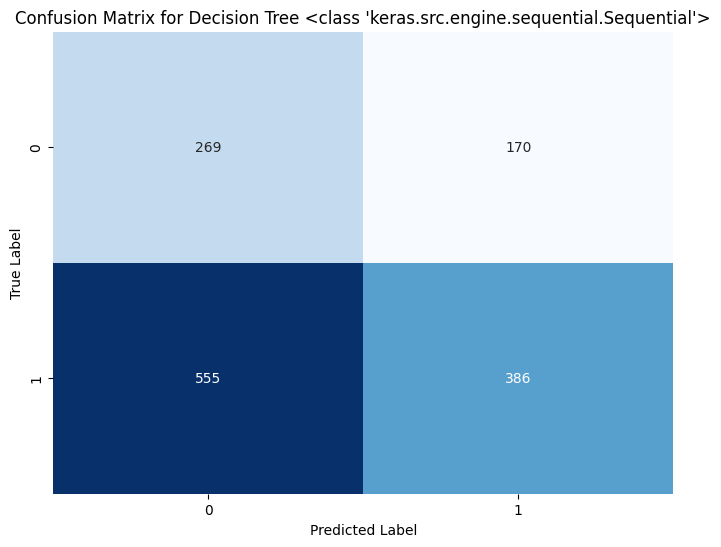

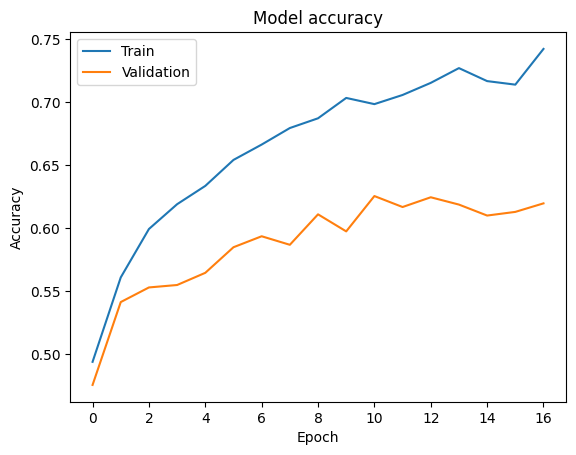

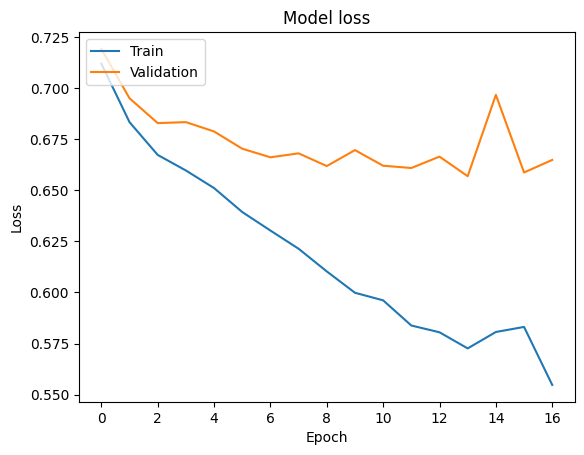

In [47]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

input_shape = (1250, 16)  # Define input shape as a tuple

def create_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(128, input_shape=input_shape, return_sequences=True))  # RNN layer with 128 units and return sequences
    model.add(SimpleRNN(128))  # Additional RNN layer with 128 units
    model.add(Dense(64, activation='relu'))  # Dense layer with 64 units and ReLU activation
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

    return model

# Pass input shape tuple to the create_model function
model = create_model(input_shape)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

hist = model.fit(X_train_dl, y_train_dl, epochs=70, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
evaluate(model, X_test, y_test)

# Plot the history
plot_history(hist)